In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

plt.style.use('classic')
sns.set()
%matplotlib inline

In [2]:
def sigmoid(x):
    if x > 500:
        return 1
    if x < -500:
        return 0
    
    return 1.0/(1.0 + np.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [3]:
def get_convergence(data_arr, output_col, w, return_number_of_incorrects=False):    
#     print (data_arr)
    outputs = [np.dot(w, x) for x in data_arr]
    outputs = sigmoid_v(outputs)
#     print (outputs)
#     print ('output_col', output_col)
#     print ('outputs', outputs)
    if return_number_of_incorrects:
        incorrects = 0
        for x, y in zip(outputs, output_col):
            if x >= 0.5:
                if y == 0:
                    incorrects += 1
#                 else:
#                     print ('correct 1')
            else:
                if y == 1:
                    incorrects += 1
#                 else:
#                     print ('correct 2')
        return incorrects
    else:
        error = np.sum(np.divide(np.power(np.subtract(output_col, outputs), 2.0), 2.0))
        return error

In [4]:
def update_weights(data_arr, output_col, w, learning_rate):
    index = np.random.randint(len(data_arr))
#     print ('index', index)
    
    r = data_arr[index]
    output = np.dot(w, r)
    sigmoid_output = sigmoid(output)
    actual_output = output_col[index]
    
    pref = (-1) * (actual_output - sigmoid_output) * sigmoid_output * (1 - sigmoid_output) * learning_rate
    delta_w = np.multiply(r, pref)
#     print ('delta_w', delta_w)
#     print ('initial_w', w)
    w = np.subtract(w, delta_w)
#     print ('updated_w', w)
    return w

In [5]:
def train_weights(train_df, output_label_df, features, max_iterations=1000):
    ctr = 0
    learning_rate = 0.5
    
    w = np.random.randn(len(features))
    # print (len(features))
    # print (len(w))

    train_arr = np.array(train_df[features])
    output_col = np.array(output_label_df)
    
    print ('get_convergence', get_convergence(train_arr, output_col, w))

    while ctr < max_iterations:
        convergence = get_convergence(train_arr, output_col, w)
        print ("Iteration: %s, Convergence: %s" % (ctr, convergence))
#         if convergence <= 0.1:
#             break

        w = update_weights(train_arr, output_col, w, learning_rate)
        ctr += 1
#         if ctr % 1000 == 0 and learning_rate > 0.001:
#             learning_rate /= 2

    print (w, get_convergence(train_arr, output_col, w))
    return w

In [6]:
def normalize(dataset, col_labels_to_skip=['y']):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    for col_label in col_labels_to_skip:
        dataNorm[col_label]=dataset[col_label]
    return dataNorm

In [7]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

## Test data

In [8]:
data = [[1, 1, 0], [1, 2, 0], [1, 3, 1], [1, 4, 1],
        [2, 1, 0], [2, 2, 0], [2, 3, 1], [2, 4, 1],
        [3, 1, 0], [3, 2, 0], [3, 3, 1], [3, 4, 1],
        [4, 1, 0], [4, 2, 0], [4, 3, 1], [4, 4, 1]]

all_data_df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
all_data_df['x0'] = [1 for _ in range(len(all_data_df))]
all_data_df.head()

x1  x2  y  x0
0   1   1  0   1
1   1   2  0   1
2   1   3  1   1
3   1   4  1   1
4   2   1  0   1

In [9]:
output_col_df = all_data_df['y']
output_col_df.head()

0    0
1    0
2    1
3    1
4    0
Name: y, dtype: int64

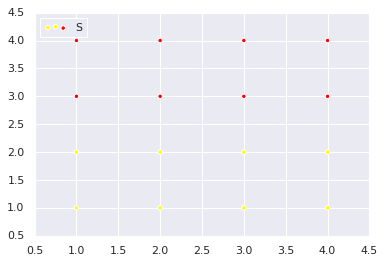

In [10]:
color_label = output_col_df.apply(lambda x: 'red' if x == 1 else 'yellow')
plt.scatter(all_data_df['x1'], all_data_df['x2'], c=color_label)
# print (color_label)
plt.legend('S', ncol=2, loc='upper left');

In [11]:
data_df = all_data_df.loc[:, all_data_df.columns != 'y']
output_col_df = all_data_df['y']

features = ['x0', 'x1', 'x2']
w = train_weights(data_df, output_col_df, features, max_iterations=80000)
print (w)

('get_convergence', 1.7749391813205877)
Iteration: 0, Convergence: 1.7749391813205877
Iteration: 1, Convergence: 2.020600285959702
Iteration: 2, Convergence: 2.0456912972385983
Iteration: 3, Convergence: 1.4356131355701933
Iteration: 4, Convergence: 1.4911546368846624
Iteration: 5, Convergence: 1.5021036056745123
Iteration: 6, Convergence: 1.7233215017131713
Iteration: 7, Convergence: 2.0652605345757116
Iteration: 8, Convergence: 1.679582612013721
Iteration: 9, Convergence: 1.2555270931522489
Iteration: 10, Convergence: 1.3809925668153966
Iteration: 11, Convergence: 1.319359277780594
Iteration: 12, Convergence: 1.2270143245041036
Iteration: 13, Convergence: 1.2866635212984954
Iteration: 14, Convergence: 1.467442387720859
Iteration: 15, Convergence: 1.4016082290904617
Iteration: 16, Convergence: 1.432868334427469
Iteration: 17, Convergence: 1.4154698362225981
Iteration: 18, Convergence: 1.1998274041196269
Iteration: 19, Convergence: 1.2305587270273777
Iteration: 20, Convergence: 1.54387

Iteration: 1005, Convergence: 0.290341095378682
Iteration: 1006, Convergence: 0.37484915228012883
Iteration: 1007, Convergence: 0.386549846373492
Iteration: 1008, Convergence: 0.2843071106180526
Iteration: 1009, Convergence: 0.28413130989573776
Iteration: 1010, Convergence: 0.2995863083809936
Iteration: 1011, Convergence: 0.298177438947837
Iteration: 1012, Convergence: 0.2968009352495886
Iteration: 1013, Convergence: 0.3158349978223425
Iteration: 1014, Convergence: 0.3365205132562649
Iteration: 1015, Convergence: 0.4115510895743534
Iteration: 1016, Convergence: 0.4122338351880561
Iteration: 1017, Convergence: 0.28555961977254707
Iteration: 1018, Convergence: 0.2864704620185282
Iteration: 1019, Convergence: 0.28742345777395073
Iteration: 1020, Convergence: 0.2864142665405307
Iteration: 1021, Convergence: 0.28567933074895446
Iteration: 1022, Convergence: 0.2922268428891537
Iteration: 1023, Convergence: 0.2901773979354393
Iteration: 1024, Convergence: 0.3278380521424159
Iteration: 1025, C

Iteration: 2018, Convergence: 0.23349975052335373
Iteration: 2019, Convergence: 0.1850995694268313
Iteration: 2020, Convergence: 0.1625256568040464
Iteration: 2021, Convergence: 0.19380098808201984
Iteration: 2022, Convergence: 0.20156794771501108
Iteration: 2023, Convergence: 0.16250588973170915
Iteration: 2024, Convergence: 0.19316189441566523
Iteration: 2025, Convergence: 0.16045778731471122
Iteration: 2026, Convergence: 0.17240772150717235
Iteration: 2027, Convergence: 0.1725037463932944
Iteration: 2028, Convergence: 0.1724046042566671
Iteration: 2029, Convergence: 0.1723060150645682
Iteration: 2030, Convergence: 0.17988504040714348
Iteration: 2031, Convergence: 0.17978549399893248
Iteration: 2032, Convergence: 0.15860313831927975
Iteration: 2033, Convergence: 0.15861362979178958
Iteration: 2034, Convergence: 0.160561585450136
Iteration: 2035, Convergence: 0.15877558572709066
Iteration: 2036, Convergence: 0.1587840933006263
Iteration: 2037, Convergence: 0.16800615942112115
Iteratio

Iteration: 3053, Convergence: 0.10577506459860879
Iteration: 3054, Convergence: 0.10541047142517881
Iteration: 3055, Convergence: 0.10458263161102249
Iteration: 3056, Convergence: 0.10837454996014995
Iteration: 3057, Convergence: 0.10434661244149535
Iteration: 3058, Convergence: 0.10434705383376038
Iteration: 3059, Convergence: 0.10434766664593065
Iteration: 3060, Convergence: 0.10434660774577914
Iteration: 3061, Convergence: 0.11253018614548575
Iteration: 3062, Convergence: 0.11253627095504716
Iteration: 3063, Convergence: 0.12534630396665614
Iteration: 3064, Convergence: 0.12841134062314488
Iteration: 3065, Convergence: 0.128427592360207
Iteration: 3066, Convergence: 0.10856919914765062
Iteration: 3067, Convergence: 0.10855583246668882
Iteration: 3068, Convergence: 0.10856486386625776
Iteration: 3069, Convergence: 0.10858000381575753
Iteration: 3070, Convergence: 0.11064486028326626
Iteration: 3071, Convergence: 0.11062584763548612
Iteration: 3072, Convergence: 0.10407041944624858
It

Iteration: 4109, Convergence: 0.07882145826484016
Iteration: 4110, Convergence: 0.07840489444308317
Iteration: 4111, Convergence: 0.07977593792587527
Iteration: 4112, Convergence: 0.07977383596965593
Iteration: 4113, Convergence: 0.08446758665642917
Iteration: 4114, Convergence: 0.09016240547436495
Iteration: 4115, Convergence: 0.08621418457084183
Iteration: 4116, Convergence: 0.08621767891345714
Iteration: 4117, Convergence: 0.0861876207212973
Iteration: 4118, Convergence: 0.08923046964453718
Iteration: 4119, Convergence: 0.07830124224793186
Iteration: 4120, Convergence: 0.07788854293967683
Iteration: 4121, Convergence: 0.07788876838156691
Iteration: 4122, Convergence: 0.07788840770213104
Iteration: 4123, Convergence: 0.0815469859452514
Iteration: 4124, Convergence: 0.08154333483886808
Iteration: 4125, Convergence: 0.08153908793429021
Iteration: 4126, Convergence: 0.08153611529849968
Iteration: 4127, Convergence: 0.07830481078266746
Iteration: 4128, Convergence: 0.07830551534539756
It

Iteration: 5127, Convergence: 0.06251273563042747
Iteration: 5128, Convergence: 0.062135323115126664
Iteration: 5129, Convergence: 0.06213550352166426
Iteration: 5130, Convergence: 0.06213480728148553
Iteration: 5131, Convergence: 0.06370170999036968
Iteration: 5132, Convergence: 0.0636998055744197
Iteration: 5133, Convergence: 0.06369606397890817
Iteration: 5134, Convergence: 0.0636956070889405
Iteration: 5135, Convergence: 0.06369602817307107
Iteration: 5136, Convergence: 0.061922401308790335
Iteration: 5137, Convergence: 0.06255463432644615
Iteration: 5138, Convergence: 0.06255480071217595
Iteration: 5139, Convergence: 0.06343251202091174
Iteration: 5140, Convergence: 0.06212174460068807
Iteration: 5141, Convergence: 0.06212136296933021
Iteration: 5142, Convergence: 0.06212201851495359
Iteration: 5143, Convergence: 0.062142250129916074
Iteration: 5144, Convergence: 0.06214190198364128
Iteration: 5145, Convergence: 0.062141221516907146
Iteration: 5146, Convergence: 0.0621415773587282

Iteration: 6156, Convergence: 0.05132688516120877
Iteration: 6157, Convergence: 0.05098521042644978
Iteration: 6158, Convergence: 0.050985123523750266
Iteration: 6159, Convergence: 0.050985096627517254
Iteration: 6160, Convergence: 0.05098505692240583
Iteration: 6161, Convergence: 0.05132808664584711
Iteration: 6162, Convergence: 0.05231787155715315
Iteration: 6163, Convergence: 0.05231822898929482
Iteration: 6164, Convergence: 0.05165690458299207
Iteration: 6165, Convergence: 0.05165629953242133
Iteration: 6166, Convergence: 0.051655694775878946
Iteration: 6167, Convergence: 0.05165586983169557
Iteration: 6168, Convergence: 0.05324469884073921
Iteration: 6169, Convergence: 0.05529035730051636
Iteration: 6170, Convergence: 0.05286784956063928
Iteration: 6171, Convergence: 0.05504833085179904
Iteration: 6172, Convergence: 0.050860796993322965
Iteration: 6173, Convergence: 0.05086070418910105
Iteration: 6174, Convergence: 0.051529966080068754
Iteration: 6175, Convergence: 0.0515297600369

Iteration: 7184, Convergence: 0.045930122252674614
Iteration: 7185, Convergence: 0.04304482988387526
Iteration: 7186, Convergence: 0.04356254469261876
Iteration: 7187, Convergence: 0.04422924752387984
Iteration: 7188, Convergence: 0.04422898368864156
Iteration: 7189, Convergence: 0.04370957497635606
Iteration: 7190, Convergence: 0.04370970807914875
Iteration: 7191, Convergence: 0.04489553043698995
Iteration: 7192, Convergence: 0.046101452931072665
Iteration: 7193, Convergence: 0.04449221150174762
Iteration: 7194, Convergence: 0.044491909762965666
Iteration: 7195, Convergence: 0.04449096620262891
Iteration: 7196, Convergence: 0.045615063114183146
Iteration: 7197, Convergence: 0.04561426116443481
Iteration: 7198, Convergence: 0.04418994751742081
Iteration: 7199, Convergence: 0.04419011772170786
Iteration: 7200, Convergence: 0.044189975376148806
Iteration: 7201, Convergence: 0.045468758237039775
Iteration: 7202, Convergence: 0.04546890673797266
Iteration: 7203, Convergence: 0.046472756829

Iteration: 8218, Convergence: 0.03723555896611678
Iteration: 8219, Convergence: 0.03723560553756766
Iteration: 8220, Convergence: 0.03723557835463455
Iteration: 8221, Convergence: 0.03723554697092366
Iteration: 8222, Convergence: 0.037615386203653206
Iteration: 8223, Convergence: 0.03721687447296285
Iteration: 8224, Convergence: 0.03721684818793024
Iteration: 8225, Convergence: 0.03727531845054904
Iteration: 8226, Convergence: 0.03727533640569337
Iteration: 8227, Convergence: 0.03723840147551122
Iteration: 8228, Convergence: 0.037238371261365824
Iteration: 8229, Convergence: 0.0372384200840201
Iteration: 8230, Convergence: 0.03723838986284929
Iteration: 8231, Convergence: 0.03723840627564998
Iteration: 8232, Convergence: 0.037238376055000744
Iteration: 8233, Convergence: 0.037238405149648025
Iteration: 8234, Convergence: 0.03723837492651469
Iteration: 8235, Convergence: 0.037238341694056015
Iteration: 8236, Convergence: 0.037238307267671196
Iteration: 8237, Convergence: 0.0372382751798

Iteration: 9265, Convergence: 0.03273158616335589
Iteration: 9266, Convergence: 0.03273151540725397
Iteration: 9267, Convergence: 0.032731476158147865
Iteration: 9268, Convergence: 0.03273143691511865
Iteration: 9269, Convergence: 0.03295801471178844
Iteration: 9270, Convergence: 0.03295797760089709
Iteration: 9271, Convergence: 0.033373344687777445
Iteration: 9272, Convergence: 0.032960060727633085
Iteration: 9273, Convergence: 0.033487829133384654
Iteration: 9274, Convergence: 0.03348776409625629
Iteration: 9275, Convergence: 0.03348769906225462
Iteration: 9276, Convergence: 0.03348772907693305
Iteration: 9277, Convergence: 0.033906055551822106
Iteration: 9278, Convergence: 0.034880188002657256
Iteration: 9279, Convergence: 0.03564068540664505
Iteration: 9280, Convergence: 0.033766083494170276
Iteration: 9281, Convergence: 0.03376611712439623
Iteration: 9282, Convergence: 0.03376603775427647
Iteration: 9283, Convergence: 0.03286178211045111
Iteration: 9284, Convergence: 0.03263706551

Iteration: 10299, Convergence: 0.03251229281268822
Iteration: 10300, Convergence: 0.03367283376425738
Iteration: 10301, Convergence: 0.03470246720213499
Iteration: 10302, Convergence: 0.03526234102212232
Iteration: 10303, Convergence: 0.03526242666513189
Iteration: 10304, Convergence: 0.03526201690270237
Iteration: 10305, Convergence: 0.03526192440232567
Iteration: 10306, Convergence: 0.03669584074526269
Iteration: 10307, Convergence: 0.03669572701584872
Iteration: 10308, Convergence: 0.03823154152420109
Iteration: 10309, Convergence: 0.03948802647767247
Iteration: 10310, Convergence: 0.0394880865681569
Iteration: 10311, Convergence: 0.034475867752431465
Iteration: 10312, Convergence: 0.0344759031651979
Iteration: 10313, Convergence: 0.03582939149649128
Iteration: 10314, Convergence: 0.03728716281378609
Iteration: 10315, Convergence: 0.03850376978330143
Iteration: 10316, Convergence: 0.03850382915260739
Iteration: 10317, Convergence: 0.03850393041606032
Iteration: 10318, Convergence: 0

Iteration: 11339, Convergence: 0.02630866758237898
Iteration: 11340, Convergence: 0.026725537641805158
Iteration: 11341, Convergence: 0.026836065410529485
Iteration: 11342, Convergence: 0.026836038884928713
Iteration: 11343, Convergence: 0.02645968754426245
Iteration: 11344, Convergence: 0.02626355860379099
Iteration: 11345, Convergence: 0.02626356584757262
Iteration: 11346, Convergence: 0.026211316938547495
Iteration: 11347, Convergence: 0.026282429801386564
Iteration: 11348, Convergence: 0.026196375665004306
Iteration: 11349, Convergence: 0.026196375992462564
Iteration: 11350, Convergence: 0.026196373245033502
Iteration: 11351, Convergence: 0.02619637049805175
Iteration: 11352, Convergence: 0.02619636859075934
Iteration: 11353, Convergence: 0.02619636920090105
Iteration: 11354, Convergence: 0.026196369367854078
Iteration: 11355, Convergence: 0.026237861302258983
Iteration: 11356, Convergence: 0.02623785572782654
Iteration: 11357, Convergence: 0.026442942663540813
Iteration: 11358, Co

Iteration: 12404, Convergence: 0.023875431354214265
Iteration: 12405, Convergence: 0.023875437422756544
Iteration: 12406, Convergence: 0.023820599836031773
Iteration: 12407, Convergence: 0.023820590427641578
Iteration: 12408, Convergence: 0.02382058101980415
Iteration: 12409, Convergence: 0.023820578325937772
Iteration: 12410, Convergence: 0.02402657934096491
Iteration: 12411, Convergence: 0.023783373108801624
Iteration: 12412, Convergence: 0.023749802130106825
Iteration: 12413, Convergence: 0.023749804191283343
Iteration: 12414, Convergence: 0.023749802630332342
Iteration: 12415, Convergence: 0.023794315837925392
Iteration: 12416, Convergence: 0.023794317825691844
Iteration: 12417, Convergence: 0.02383885114250682
Iteration: 12418, Convergence: 0.02370729188190718
Iteration: 12419, Convergence: 0.023711869588967496
Iteration: 12420, Convergence: 0.02371186618434594
Iteration: 12421, Convergence: 0.023791103615970123
Iteration: 12422, Convergence: 0.02371984251361906
Iteration: 12423, 

Iteration: 13474, Convergence: 0.02278122204626997
Iteration: 13475, Convergence: 0.02278120343020882
Iteration: 13476, Convergence: 0.022781190615689464
Iteration: 13477, Convergence: 0.02333203887278909
Iteration: 13478, Convergence: 0.022647798692419223
Iteration: 13479, Convergence: 0.022163731487130047
Iteration: 13480, Convergence: 0.02216372003407087
Iteration: 13481, Convergence: 0.022618461756320013
Iteration: 13482, Convergence: 0.02214296872743808
Iteration: 13483, Convergence: 0.021834580423701972
Iteration: 13484, Convergence: 0.021834572828034464
Iteration: 13485, Convergence: 0.022025544755830455
Iteration: 13486, Convergence: 0.022025547650568224
Iteration: 13487, Convergence: 0.022025552750335742
Iteration: 13488, Convergence: 0.021763490934358233
Iteration: 13489, Convergence: 0.02176348592040394
Iteration: 13490, Convergence: 0.021638564396839047
Iteration: 13491, Convergence: 0.021638563029036766
Iteration: 13492, Convergence: 0.021726205014026036
Iteration: 13493, 

Iteration: 14530, Convergence: 0.02138647670393475
Iteration: 14531, Convergence: 0.021592886603047916
Iteration: 14532, Convergence: 0.02106275420065754
Iteration: 14533, Convergence: 0.021062758616530793
Iteration: 14534, Convergence: 0.021183002919265528
Iteration: 14535, Convergence: 0.021183017986533898
Iteration: 14536, Convergence: 0.02118300140475072
Iteration: 14537, Convergence: 0.021183005958214277
Iteration: 14538, Convergence: 0.02118298937654855
Iteration: 14539, Convergence: 0.021628150915202787
Iteration: 14540, Convergence: 0.021036716892825796
Iteration: 14541, Convergence: 0.021036701308642047
Iteration: 14542, Convergence: 0.02103670569604285
Iteration: 14543, Convergence: 0.021227575161777472
Iteration: 14544, Convergence: 0.02167576848618945
Iteration: 14545, Convergence: 0.021675751638504687
Iteration: 14546, Convergence: 0.02181613642711809
Iteration: 14547, Convergence: 0.021176782129903975
Iteration: 14548, Convergence: 0.02068640352636824
Iteration: 14549, Co

Iteration: 15598, Convergence: 0.01842911460600749
Iteration: 15599, Convergence: 0.018429114584299196
Iteration: 15600, Convergence: 0.018429113935069793
Iteration: 15601, Convergence: 0.018429113929922053
Iteration: 15602, Convergence: 0.01845483765360484
Iteration: 15603, Convergence: 0.018421067343039232
Iteration: 15604, Convergence: 0.018421067484829863
Iteration: 15605, Convergence: 0.018451576200413607
Iteration: 15606, Convergence: 0.018451574258711384
Iteration: 15607, Convergence: 0.018546101110904115
Iteration: 15608, Convergence: 0.018492485575091807
Iteration: 15609, Convergence: 0.01849247865851763
Iteration: 15610, Convergence: 0.018413444031501316
Iteration: 15611, Convergence: 0.018413444383739135
Iteration: 15612, Convergence: 0.018413444677017624
Iteration: 15613, Convergence: 0.018413443997692607
Iteration: 15614, Convergence: 0.018413441847331995
Iteration: 15615, Convergence: 0.01841344214055142
Iteration: 15616, Convergence: 0.018413442492774944
Iteration: 15617

Iteration: 16670, Convergence: 0.01736581418965381
Iteration: 16671, Convergence: 0.017365816157553435
Iteration: 16672, Convergence: 0.01720307657275594
Iteration: 16673, Convergence: 0.017203074116276654
Iteration: 16674, Convergence: 0.01720307491318488
Iteration: 16675, Convergence: 0.01720307237305434
Iteration: 16676, Convergence: 0.01740108926415483
Iteration: 16677, Convergence: 0.017554271256296952
Iteration: 16678, Convergence: 0.01755427765910394
Iteration: 16679, Convergence: 0.01755428008613867
Iteration: 16680, Convergence: 0.017727537416825805
Iteration: 16681, Convergence: 0.01772753188579003
Iteration: 16682, Convergence: 0.017841548617993433
Iteration: 16683, Convergence: 0.01754009178131248
Iteration: 16684, Convergence: 0.017712568795539695
Iteration: 16685, Convergence: 0.017712571499462648
Iteration: 16686, Convergence: 0.017486538162924455
Iteration: 16687, Convergence: 0.017486534433006518
Iteration: 16688, Convergence: 0.017297947246272816
Iteration: 16689, Con

Iteration: 17718, Convergence: 0.01603380441013672
Iteration: 17719, Convergence: 0.01602529737354612
Iteration: 17720, Convergence: 0.01605798853525105
Iteration: 17721, Convergence: 0.016057989082678997
Iteration: 17722, Convergence: 0.016029761674608258
Iteration: 17723, Convergence: 0.016080246580386075
Iteration: 17724, Convergence: 0.01601147361167605
Iteration: 17725, Convergence: 0.016026887394241386
Iteration: 17726, Convergence: 0.016006064867101953
Iteration: 17727, Convergence: 0.016006064644573006
Iteration: 17728, Convergence: 0.016013912479155346
Iteration: 17729, Convergence: 0.0160034452910048
Iteration: 17730, Convergence: 0.0160034451891386
Iteration: 17731, Convergence: 0.016003445145765936
Iteration: 17732, Convergence: 0.0160249741478075
Iteration: 17733, Convergence: 0.016089473930344166
Iteration: 17734, Convergence: 0.016089473102846204
Iteration: 17735, Convergence: 0.016182826578142046
Iteration: 17736, Convergence: 0.016182827784936536
Iteration: 17737, Conv

Iteration: 18797, Convergence: 0.015055721656301533
Iteration: 18798, Convergence: 0.01511583709714141
Iteration: 18799, Convergence: 0.015185182742866583
Iteration: 18800, Convergence: 0.015185183623186615
Iteration: 18801, Convergence: 0.015120172645458854
Iteration: 18802, Convergence: 0.015120173606099402
Iteration: 18803, Convergence: 0.01504656324681877
Iteration: 18804, Convergence: 0.015046563706305917
Iteration: 18805, Convergence: 0.015099449635000038
Iteration: 18806, Convergence: 0.015165671612755234
Iteration: 18807, Convergence: 0.015266750070029048
Iteration: 18808, Convergence: 0.015368614720426835
Iteration: 18809, Convergence: 0.015262366626550679
Iteration: 18810, Convergence: 0.015214764681599185
Iteration: 18811, Convergence: 0.015214765640023595
Iteration: 18812, Convergence: 0.015214760057548907
Iteration: 18813, Convergence: 0.015172914842883557
Iteration: 18814, Convergence: 0.015069655365397665
Iteration: 18815, Convergence: 0.015115776615425729
Iteration: 188

Iteration: 19863, Convergence: 0.014251738076799178
Iteration: 19864, Convergence: 0.014251738609137029
Iteration: 19865, Convergence: 0.014339866061518472
Iteration: 19866, Convergence: 0.01430417665244795
Iteration: 19867, Convergence: 0.01437963855328862
Iteration: 19868, Convergence: 0.014379639335208376
Iteration: 19869, Convergence: 0.014467619763247078
Iteration: 19870, Convergence: 0.014314502596287908
Iteration: 19871, Convergence: 0.014314498606614476
Iteration: 19872, Convergence: 0.014168489321406803
Iteration: 19873, Convergence: 0.014168488545704336
Iteration: 19874, Convergence: 0.014143019347979055
Iteration: 19875, Convergence: 0.014143019167925012
Iteration: 19876, Convergence: 0.014157671130484464
Iteration: 19877, Convergence: 0.014157671406648404
Iteration: 19878, Convergence: 0.014143993404846643
Iteration: 19879, Convergence: 0.014170995838021474
Iteration: 19880, Convergence: 0.014204036858596872
Iteration: 19881, Convergence: 0.014133962598876903
Iteration: 198

Iteration: 20930, Convergence: 0.01357748979589338
Iteration: 20931, Convergence: 0.01357749049328618
Iteration: 20932, Convergence: 0.013435838422893006
Iteration: 20933, Convergence: 0.013435838214727956
Iteration: 20934, Convergence: 0.013486850617620935
Iteration: 20935, Convergence: 0.013403403488757548
Iteration: 20936, Convergence: 0.013431095694793376
Iteration: 20937, Convergence: 0.013431095257902034
Iteration: 20938, Convergence: 0.013431095626407824
Iteration: 20939, Convergence: 0.013485349549229636
Iteration: 20940, Convergence: 0.013564241255833104
Iteration: 20941, Convergence: 0.013531676336039111
Iteration: 20942, Convergence: 0.013447086515080526
Iteration: 20943, Convergence: 0.013513137619414214
Iteration: 20944, Convergence: 0.013513138360033556
Iteration: 20945, Convergence: 0.013592459725985443
Iteration: 20946, Convergence: 0.013653529991492462
Iteration: 20947, Convergence: 0.013653531032178255
Iteration: 20948, Convergence: 0.013653531914132301
Iteration: 209

Iteration: 21955, Convergence: 0.012772907626326215
Iteration: 21956, Convergence: 0.012772908195854558
Iteration: 21957, Convergence: 0.012772908765392063
Iteration: 21958, Convergence: 0.012772909334938723
Iteration: 21959, Convergence: 0.012772909442366405
Iteration: 21960, Convergence: 0.01277290909131686
Iteration: 21961, Convergence: 0.012772909660870234
Iteration: 21962, Convergence: 0.01275463231983236
Iteration: 21963, Convergence: 0.012796994753039375
Iteration: 21964, Convergence: 0.012884082906406693
Iteration: 21965, Convergence: 0.01288408224964754
Iteration: 21966, Convergence: 0.012884081592890213
Iteration: 21967, Convergence: 0.012812641389619343
Iteration: 21968, Convergence: 0.01284230433723092
Iteration: 21969, Convergence: 0.012842305517127756
Iteration: 21970, Convergence: 0.012876826843519205
Iteration: 21971, Convergence: 0.012876827118439469
Iteration: 21972, Convergence: 0.012876827393360001
Iteration: 21973, Convergence: 0.012802995079204536
Iteration: 21974

Iteration: 23015, Convergence: 0.012282692468889904
Iteration: 23016, Convergence: 0.012205595915986706
Iteration: 23017, Convergence: 0.012205596255750777
Iteration: 23018, Convergence: 0.012205595727220726
Iteration: 23019, Convergence: 0.012205596297840399
Iteration: 23020, Convergence: 0.012153436084937881
Iteration: 23021, Convergence: 0.012174884287015936
Iteration: 23022, Convergence: 0.01217488507324399
Iteration: 23023, Convergence: 0.012189158489482401
Iteration: 23024, Convergence: 0.01224029343975247
Iteration: 23025, Convergence: 0.01224029273426389
Iteration: 23026, Convergence: 0.012240293822381773
Iteration: 23027, Convergence: 0.012176630057624694
Iteration: 23028, Convergence: 0.012203777341820448
Iteration: 23029, Convergence: 0.012203776799320845
Iteration: 23030, Convergence: 0.012151595529833558
Iteration: 23031, Convergence: 0.012120771402558845
Iteration: 23032, Convergence: 0.012120771513491712
Iteration: 23033, Convergence: 0.012109526261282172
Iteration: 2303

Iteration: 24072, Convergence: 0.011553632589875833
Iteration: 24073, Convergence: 0.011551391112637546
Iteration: 24074, Convergence: 0.011558961886898035
Iteration: 24075, Convergence: 0.01155019542688791
Iteration: 24076, Convergence: 0.011550195366908133
Iteration: 24077, Convergence: 0.011550366683580013
Iteration: 24078, Convergence: 0.011550366729848162
Iteration: 24079, Convergence: 0.011550366749334504
Iteration: 24080, Convergence: 0.011550366642081894
Iteration: 24081, Convergence: 0.011580702880130507
Iteration: 24082, Convergence: 0.011557715403692399
Iteration: 24083, Convergence: 0.011545576204548512
Iteration: 24084, Convergence: 0.011546857588631339
Iteration: 24085, Convergence: 0.011546857453628045
Iteration: 24086, Convergence: 0.011546857494348675
Iteration: 24087, Convergence: 0.011542341584137509
Iteration: 24088, Convergence: 0.01154234151762963
Iteration: 24089, Convergence: 0.011541273972873736
Iteration: 24090, Convergence: 0.011541273966694217
Iteration: 240

Iteration: 25116, Convergence: 0.011066105019218259
Iteration: 25117, Convergence: 0.01110864104973417
Iteration: 25118, Convergence: 0.011073836554101737
Iteration: 25119, Convergence: 0.011073836335680876
Iteration: 25120, Convergence: 0.011073836456427991
Iteration: 25121, Convergence: 0.011056766934206687
Iteration: 25122, Convergence: 0.011056767019540968
Iteration: 25123, Convergence: 0.011090458858403478
Iteration: 25124, Convergence: 0.011090459028450335
Iteration: 25125, Convergence: 0.011090458798324857
Iteration: 25126, Convergence: 0.011090458895085602
Iteration: 25127, Convergence: 0.011109946473957546
Iteration: 25128, Convergence: 0.011180688290131344
Iteration: 25129, Convergence: 0.01118068846638049
Iteration: 25130, Convergence: 0.011131547462862029
Iteration: 25131, Convergence: 0.011131547079019737
Iteration: 25132, Convergence: 0.011131547220726588
Iteration: 25133, Convergence: 0.011158174915780854
Iteration: 25134, Convergence: 0.0111052318058756
Iteration: 25135

Iteration: 26169, Convergence: 0.010565305298774858
Iteration: 26170, Convergence: 0.010565305550356289
Iteration: 26171, Convergence: 0.010571577173358769
Iteration: 26172, Convergence: 0.010571577281935477
Iteration: 26173, Convergence: 0.010571577088176843
Iteration: 26174, Convergence: 0.01055322268439076
Iteration: 26175, Convergence: 0.010553222762435088
Iteration: 26176, Convergence: 0.010560836082322007
Iteration: 26177, Convergence: 0.010560836163949684
Iteration: 26178, Convergence: 0.010566758372321773
Iteration: 26179, Convergence: 0.010566758225631013
Iteration: 26180, Convergence: 0.01056675804022827
Iteration: 26181, Convergence: 0.010592131312248659
Iteration: 26182, Convergence: 0.010602856709957188
Iteration: 26183, Convergence: 0.010568931598939523
Iteration: 26184, Convergence: 0.010550277284976659
Iteration: 26185, Convergence: 0.010550277159770572
Iteration: 26186, Convergence: 0.010554580471769498
Iteration: 26187, Convergence: 0.010542418549670345
Iteration: 261

Iteration: 27209, Convergence: 0.010112711491435621
Iteration: 27210, Convergence: 0.010112711457430437
Iteration: 27211, Convergence: 0.010112711474138933
Iteration: 27212, Convergence: 0.01011271149981351
Iteration: 27213, Convergence: 0.010112711525488455
Iteration: 27214, Convergence: 0.010112711552682193
Iteration: 27215, Convergence: 0.010112711578357846
Iteration: 27216, Convergence: 0.010124961392306626
Iteration: 27217, Convergence: 0.010114584254335552
Iteration: 27218, Convergence: 0.010114584209156362
Iteration: 27219, Convergence: 0.01011063495744461
Iteration: 27220, Convergence: 0.010107998234638881
Iteration: 27221, Convergence: 0.010107998175832054
Iteration: 27222, Convergence: 0.010107998153931055
Iteration: 27223, Convergence: 0.010117654222177707
Iteration: 27224, Convergence: 0.010133741849822093
Iteration: 27225, Convergence: 0.010133741762336852
Iteration: 27226, Convergence: 0.010133741500811973
Iteration: 27227, Convergence: 0.010133741061312986
Iteration: 272

Iteration: 28259, Convergence: 0.009734668236427957
Iteration: 28260, Convergence: 0.009734668386780644
Iteration: 28261, Convergence: 0.009715577111009392
Iteration: 28262, Convergence: 0.009707767827556156
Iteration: 28263, Convergence: 0.009707767773454718
Iteration: 28264, Convergence: 0.009707767795768776
Iteration: 28265, Convergence: 0.009707767751962014
Iteration: 28266, Convergence: 0.009707767794952093
Iteration: 28267, Convergence: 0.00970776774085012
Iteration: 28268, Convergence: 0.009707767783841128
Iteration: 28269, Convergence: 0.009707767793923091
Iteration: 28270, Convergence: 0.00971663689821648
Iteration: 28271, Convergence: 0.009716636927494728
Iteration: 28272, Convergence: 0.009706391163402758
Iteration: 28273, Convergence: 0.009706391164803829
Iteration: 28274, Convergence: 0.009705317703286382
Iteration: 28275, Convergence: 0.009705317705432185
Iteration: 28276, Convergence: 0.009705317700885695
Iteration: 28277, Convergence: 0.009714136606829833
Iteration: 282

Iteration: 29261, Convergence: 0.009414572307407124
Iteration: 29262, Convergence: 0.009439804528599566
Iteration: 29263, Convergence: 0.009439804707028477
Iteration: 29264, Convergence: 0.009371474462416549
Iteration: 29265, Convergence: 0.009399758105110761
Iteration: 29266, Convergence: 0.009399757781311932
Iteration: 29267, Convergence: 0.009350997368456574
Iteration: 29268, Convergence: 0.009350997118625647
Iteration: 29269, Convergence: 0.00934078067334173
Iteration: 29270, Convergence: 0.00935608563470733
Iteration: 29271, Convergence: 0.009338613013675643
Iteration: 29272, Convergence: 0.009347473163834979
Iteration: 29273, Convergence: 0.009333718239206657
Iteration: 29274, Convergence: 0.009330803888994151
Iteration: 29275, Convergence: 0.009330803886221286
Iteration: 29276, Convergence: 0.009335542463089319
Iteration: 29277, Convergence: 0.009361030861826804
Iteration: 29278, Convergence: 0.009343297045437404
Iteration: 29279, Convergence: 0.009348554383594092
Iteration: 292

Iteration: 30322, Convergence: 0.008985552362441992
Iteration: 30323, Convergence: 0.008985552342282602
Iteration: 30324, Convergence: 0.008985552312384388
Iteration: 30325, Convergence: 0.00898555229222513
Iteration: 30326, Convergence: 0.008990007976670997
Iteration: 30327, Convergence: 0.00898298547563671
Iteration: 30328, Convergence: 0.008982985462137792
Iteration: 30329, Convergence: 0.008989931827174188
Iteration: 30330, Convergence: 0.008989931758110904
Iteration: 30331, Convergence: 0.008989931688324742
Iteration: 30332, Convergence: 0.008989931787074905
Iteration: 30333, Convergence: 0.008989931723949867
Iteration: 30334, Convergence: 0.009003289111135768
Iteration: 30335, Convergence: 0.0090032892137171
Iteration: 30336, Convergence: 0.009022972535450164
Iteration: 30337, Convergence: 0.009022972620673182
Iteration: 30338, Convergence: 0.009022972669912992
Iteration: 30339, Convergence: 0.00900325889949935
Iteration: 30340, Convergence: 0.008988053907094461
Iteration: 30341,

Iteration: 31325, Convergence: 0.008692144653392379
Iteration: 31326, Convergence: 0.008692144595121156
Iteration: 31327, Convergence: 0.008721902294119536
Iteration: 31328, Convergence: 0.008703086890558293
Iteration: 31329, Convergence: 0.008703086813849712
Iteration: 31330, Convergence: 0.008703086723722595
Iteration: 31331, Convergence: 0.008739054575707388
Iteration: 31332, Convergence: 0.008739054457427321
Iteration: 31333, Convergence: 0.008767056232081655
Iteration: 31334, Convergence: 0.00873135497000264
Iteration: 31335, Convergence: 0.008709765134828629
Iteration: 31336, Convergence: 0.00868835319881705
Iteration: 31337, Convergence: 0.008688353326990566
Iteration: 31338, Convergence: 0.008688353371858346
Iteration: 31339, Convergence: 0.008688353396982321
Iteration: 31340, Convergence: 0.008697353822456507
Iteration: 31341, Convergence: 0.008684061359596883
Iteration: 31342, Convergence: 0.008688343873173642
Iteration: 31343, Convergence: 0.008676385595476368
Iteration: 313

Iteration: 32404, Convergence: 0.008488255985428602
Iteration: 32405, Convergence: 0.00848825608336502
Iteration: 32406, Convergence: 0.008488256212341451
Iteration: 32407, Convergence: 0.008518539182765867
Iteration: 32408, Convergence: 0.008518539328284447
Iteration: 32409, Convergence: 0.008518539117476274
Iteration: 32410, Convergence: 0.008551768083665652
Iteration: 32411, Convergence: 0.0085311483239171
Iteration: 32412, Convergence: 0.00853114845792436
Iteration: 32413, Convergence: 0.008531148591931702
Iteration: 32414, Convergence: 0.008497929328407422
Iteration: 32415, Convergence: 0.00849792944906165
Iteration: 32416, Convergence: 0.008497929583995836
Iteration: 32417, Convergence: 0.00849792970465017
Iteration: 32418, Convergence: 0.008534869941973354
Iteration: 32419, Convergence: 0.008449243055114738
Iteration: 32420, Convergence: 0.008449243137715797
Iteration: 32421, Convergence: 0.008449243244318628
Iteration: 32422, Convergence: 0.008396791676807267
Iteration: 32423, 

Iteration: 33455, Convergence: 0.008152528635630006
Iteration: 33456, Convergence: 0.008130232943725736
Iteration: 33457, Convergence: 0.008135802536063894
Iteration: 33458, Convergence: 0.008135802465206284
Iteration: 33459, Convergence: 0.008135802394348742
Iteration: 33460, Convergence: 0.008135802306852324
Iteration: 33461, Convergence: 0.00812095096026428
Iteration: 33462, Convergence: 0.00812095089233056
Iteration: 33463, Convergence: 0.008120950830282601
Iteration: 33464, Convergence: 0.008120950852207064
Iteration: 33465, Convergence: 0.008110270150745435
Iteration: 33466, Convergence: 0.008110270225178027
Iteration: 33467, Convergence: 0.008116554837264306
Iteration: 33468, Convergence: 0.008116554872421376
Iteration: 33469, Convergence: 0.008116554892097843
Iteration: 33470, Convergence: 0.00814263367664603
Iteration: 33471, Convergence: 0.00812213757450186
Iteration: 33472, Convergence: 0.00812213751640057
Iteration: 33473, Convergence: 0.008122137633601513
Iteration: 33474,

Iteration: 34500, Convergence: 0.007857084360750428
Iteration: 34501, Convergence: 0.007853603998533507
Iteration: 34502, Convergence: 0.007852080646983138
Iteration: 34503, Convergence: 0.007854408413657886
Iteration: 34504, Convergence: 0.007851957095554312
Iteration: 34505, Convergence: 0.007853148694279173
Iteration: 34506, Convergence: 0.007867662364585262
Iteration: 34507, Convergence: 0.007867662308017418
Iteration: 34508, Convergence: 0.007867662401424
Iteration: 34509, Convergence: 0.007867662419846258
Iteration: 34510, Convergence: 0.007867662363278271
Iteration: 34511, Convergence: 0.007867662381700509
Iteration: 34512, Convergence: 0.007857026979244088
Iteration: 34513, Convergence: 0.007857026990694934
Iteration: 34514, Convergence: 0.007857027011383494
Iteration: 34515, Convergence: 0.007851557768889439
Iteration: 34516, Convergence: 0.007851557779207053
Iteration: 34517, Convergence: 0.00785155775368981
Iteration: 34518, Convergence: 0.007858477541467443
Iteration: 34519

Iteration: 35556, Convergence: 0.0077358597089786365
Iteration: 35557, Convergence: 0.00777285598552444
Iteration: 35558, Convergence: 0.007772856098832381
Iteration: 35559, Convergence: 0.007772856208622893
Iteration: 35560, Convergence: 0.007809155545858414
Iteration: 35561, Convergence: 0.007775104603980512
Iteration: 35562, Convergence: 0.007775104515414277
Iteration: 35563, Convergence: 0.0077751046296899665
Iteration: 35564, Convergence: 0.00781166106640966
Iteration: 35565, Convergence: 0.0077168153412728955
Iteration: 35566, Convergence: 0.007748112109478227
Iteration: 35567, Convergence: 0.007771007003823086
Iteration: 35568, Convergence: 0.007754101885419723
Iteration: 35569, Convergence: 0.007789053350343446
Iteration: 35570, Convergence: 0.0077890531814305795
Iteration: 35571, Convergence: 0.007771146052707217
Iteration: 35572, Convergence: 0.007771145964808466
Iteration: 35573, Convergence: 0.007719431775333063
Iteration: 35574, Convergence: 0.007705550304368336
Iteration:

Iteration: 36632, Convergence: 0.007468319496088668
Iteration: 36633, Convergence: 0.007468319437933527
Iteration: 36634, Convergence: 0.007468319506285427
Iteration: 36635, Convergence: 0.007500434143007415
Iteration: 36636, Convergence: 0.007500434075111426
Iteration: 36637, Convergence: 0.007500434166179607
Iteration: 36638, Convergence: 0.007500434254605027
Iteration: 36639, Convergence: 0.007536231263854584
Iteration: 36640, Convergence: 0.007571023577427198
Iteration: 36641, Convergence: 0.00755307094520375
Iteration: 36642, Convergence: 0.007553071047779076
Iteration: 36643, Convergence: 0.007553070965450104
Iteration: 36644, Convergence: 0.007553071068025441
Iteration: 36645, Convergence: 0.007466947199269946
Iteration: 36646, Convergence: 0.0074908914000018315
Iteration: 36647, Convergence: 0.0074908914752611685
Iteration: 36648, Convergence: 0.007511474422873829
Iteration: 36649, Convergence: 0.007544406338006842
Iteration: 36650, Convergence: 0.007514184340232881
Iteration: 

Iteration: 37682, Convergence: 0.007198552540684529
Iteration: 37683, Convergence: 0.007198552501393357
Iteration: 37684, Convergence: 0.007213360605474717
Iteration: 37685, Convergence: 0.007237399599692804
Iteration: 37686, Convergence: 0.007182556987537862
Iteration: 37687, Convergence: 0.007182557035796664
Iteration: 37688, Convergence: 0.007147993076042181
Iteration: 37689, Convergence: 0.007147993038768832
Iteration: 37690, Convergence: 0.007147993001495483
Iteration: 37691, Convergence: 0.007143442787215397
Iteration: 37692, Convergence: 0.0071555732656796486
Iteration: 37693, Convergence: 0.007155573240710329
Iteration: 37694, Convergence: 0.0071329412374683465
Iteration: 37695, Convergence: 0.007124732241399326
Iteration: 37696, Convergence: 0.007126863021840608
Iteration: 37697, Convergence: 0.007126863026622427
Iteration: 37698, Convergence: 0.007126863012385622
Iteration: 37699, Convergence: 0.007126863003961563
Iteration: 37700, Convergence: 0.007133182242060249
Iteration:

Iteration: 38745, Convergence: 0.006923167095132717
Iteration: 38746, Convergence: 0.006923167082428407
Iteration: 38747, Convergence: 0.006922171655374895
Iteration: 38748, Convergence: 0.00692217164761805
Iteration: 38749, Convergence: 0.006922171649060147
Iteration: 38750, Convergence: 0.00692217164977413
Iteration: 38751, Convergence: 0.006922656746545998
Iteration: 38752, Convergence: 0.006922656732808485
Iteration: 38753, Convergence: 0.006921323586059546
Iteration: 38754, Convergence: 0.006921244308886979
Iteration: 38755, Convergence: 0.006920521657497634
Iteration: 38756, Convergence: 0.006922216544810622
Iteration: 38757, Convergence: 0.006919555570888854
Iteration: 38758, Convergence: 0.006918657922812865
Iteration: 38759, Convergence: 0.0069186579244799665
Iteration: 38760, Convergence: 0.006917956415875122
Iteration: 38761, Convergence: 0.006917956412257184
Iteration: 38762, Convergence: 0.006917956409954147
Iteration: 38763, Convergence: 0.0069187764459729875
Iteration: 3

Iteration: 39800, Convergence: 0.006714673150719317
Iteration: 39801, Convergence: 0.006713065279732519
Iteration: 39802, Convergence: 0.006718051123674636
Iteration: 39803, Convergence: 0.006723390024498394
Iteration: 39804, Convergence: 0.006723390040922888
Iteration: 39805, Convergence: 0.00672031084027938
Iteration: 39806, Convergence: 0.0067203108555397555
Iteration: 39807, Convergence: 0.006717635861343537
Iteration: 39808, Convergence: 0.0067176358723468835
Iteration: 39809, Convergence: 0.00671763588281982
Iteration: 39810, Convergence: 0.006717635831727416
Iteration: 39811, Convergence: 0.0067176358220728885
Iteration: 39812, Convergence: 0.006722927912742177
Iteration: 39813, Convergence: 0.00672292790034878
Iteration: 39814, Convergence: 0.00672292787810652
Iteration: 39815, Convergence: 0.006731172465141801
Iteration: 39816, Convergence: 0.006731172378457248
Iteration: 39817, Convergence: 0.006731172400820057
Iteration: 39818, Convergence: 0.006731172384957626
Iteration: 39

Iteration: 40866, Convergence: 0.006562248227211477
Iteration: 40867, Convergence: 0.006547462035318178
Iteration: 40868, Convergence: 0.006547462003606685
Iteration: 40869, Convergence: 0.006547461977516652
Iteration: 40870, Convergence: 0.006547461955665178
Iteration: 40871, Convergence: 0.0065474619338137426
Iteration: 40872, Convergence: 0.006547461902102299
Iteration: 40873, Convergence: 0.006536686870977318
Iteration: 40874, Convergence: 0.006529752158778327
Iteration: 40875, Convergence: 0.0065297521452394895
Iteration: 40876, Convergence: 0.006527317220640521
Iteration: 40877, Convergence: 0.006526457769140796
Iteration: 40878, Convergence: 0.006529049557148014
Iteration: 40879, Convergence: 0.006533605665564815
Iteration: 40880, Convergence: 0.006533605677538768
Iteration: 40881, Convergence: 0.006533605689512757
Iteration: 40882, Convergence: 0.006533605660544518
Iteration: 40883, Convergence: 0.006533605612595394
Iteration: 40884, Convergence: 0.006533605583627283
Iteration:

Iteration: 41923, Convergence: 0.006428457888293058
Iteration: 41924, Convergence: 0.006428457923757238
Iteration: 41925, Convergence: 0.006428457954778372
Iteration: 41926, Convergence: 0.006393170914393707
Iteration: 41927, Convergence: 0.0063931709325672145
Iteration: 41928, Convergence: 0.006408028923879297
Iteration: 41929, Convergence: 0.006379776863093637
Iteration: 41930, Convergence: 0.006379776849902118
Iteration: 41931, Convergence: 0.006373275822171817
Iteration: 41932, Convergence: 0.006373275764242064
Iteration: 41933, Convergence: 0.0063679892859326275
Iteration: 41934, Convergence: 0.006367989270203139
Iteration: 41935, Convergence: 0.006367989281378463
Iteration: 41936, Convergence: 0.0063732464710213686
Iteration: 41937, Convergence: 0.006373246451383874
Iteration: 41938, Convergence: 0.00637324646591207
Iteration: 41939, Convergence: 0.006382689027301404
Iteration: 41940, Convergence: 0.006382689046094276
Iteration: 41941, Convergence: 0.006382689001320526
Iteration:

Iteration: 42995, Convergence: 0.006207339360359432
Iteration: 42996, Convergence: 0.006216111153921979
Iteration: 42997, Convergence: 0.006208224307756047
Iteration: 42998, Convergence: 0.0062043366709491074
Iteration: 42999, Convergence: 0.006204336635391806
Iteration: 43000, Convergence: 0.0062043366512677875
Iteration: 43001, Convergence: 0.006204336663806404
Iteration: 43002, Convergence: 0.006190449544747151
Iteration: 43003, Convergence: 0.006190449533831906
Iteration: 43004, Convergence: 0.006195073326570667
Iteration: 43005, Convergence: 0.006203211505182752
Iteration: 43006, Convergence: 0.00620321152104013
Iteration: 43007, Convergence: 0.006213007474879871
Iteration: 43008, Convergence: 0.006205297758783529
Iteration: 43009, Convergence: 0.0062124935214267546
Iteration: 43010, Convergence: 0.006224377183696043
Iteration: 43011, Convergence: 0.006200566830029497
Iteration: 43012, Convergence: 0.006200566844507229
Iteration: 43013, Convergence: 0.006200566824003389
Iteration:

Iteration: 44069, Convergence: 0.006059106773871716
Iteration: 44070, Convergence: 0.006065679133179921
Iteration: 44071, Convergence: 0.006086715680444041
Iteration: 44072, Convergence: 0.006086715740680302
Iteration: 44073, Convergence: 0.006086715705621231
Iteration: 44074, Convergence: 0.0060696111696545065
Iteration: 44075, Convergence: 0.0060549358886132585
Iteration: 44076, Convergence: 0.006054935868053328
Iteration: 44077, Convergence: 0.006043431241929527
Iteration: 44078, Convergence: 0.006036068214938349
Iteration: 44079, Convergence: 0.006038118376868498
Iteration: 44080, Convergence: 0.006038118382548689
Iteration: 44081, Convergence: 0.006038118392646729
Iteration: 44082, Convergence: 0.00603123997552521
Iteration: 44083, Convergence: 0.006041278502289596
Iteration: 44084, Convergence: 0.006033143344657181
Iteration: 44085, Convergence: 0.006028083827084673
Iteration: 44086, Convergence: 0.00602808383976578
Iteration: 44087, Convergence: 0.006028083831270308
Iteration: 4

Iteration: 45141, Convergence: 0.005974510739770614
Iteration: 45142, Convergence: 0.00597451069546447
Iteration: 45143, Convergence: 0.005948561597465669
Iteration: 45144, Convergence: 0.005926925651094152
Iteration: 45145, Convergence: 0.005926925633921657
Iteration: 45146, Convergence: 0.00592692565535846
Iteration: 45147, Convergence: 0.005926925638185988
Iteration: 45148, Convergence: 0.005926925621013504
Iteration: 45149, Convergence: 0.0059269256452671795
Iteration: 45150, Convergence: 0.005939264256614618
Iteration: 45151, Convergence: 0.005939264221945055
Iteration: 45152, Convergence: 0.00595539050463581
Iteration: 45153, Convergence: 0.005942015948635948
Iteration: 45154, Convergence: 0.005942015885962812
Iteration: 45155, Convergence: 0.005958466197160335
Iteration: 45156, Convergence: 0.005976464173750284
Iteration: 45157, Convergence: 0.005976464207169222
Iteration: 45158, Convergence: 0.00597646423618568
Iteration: 45159, Convergence: 0.005968050039583929
Iteration: 4516

Iteration: 46206, Convergence: 0.005779527268761187
Iteration: 46207, Convergence: 0.005787907199213485
Iteration: 46208, Convergence: 0.00578790711661833
Iteration: 46209, Convergence: 0.005787907034023245
Iteration: 46210, Convergence: 0.005796890356672438
Iteration: 46211, Convergence: 0.005796890372914562
Iteration: 46212, Convergence: 0.005796890389156697
Iteration: 46213, Convergence: 0.00580645335533199
Iteration: 46214, Convergence: 0.005806453256135554
Iteration: 46215, Convergence: 0.005773420530508741
Iteration: 46216, Convergence: 0.005773420546634029
Iteration: 46217, Convergence: 0.005773420565015646
Iteration: 46218, Convergence: 0.005773420583397256
Iteration: 46219, Convergence: 0.0057813527151230615
Iteration: 46220, Convergence: 0.005789902239124534
Iteration: 46221, Convergence: 0.005789902258187743
Iteration: 46222, Convergence: 0.005806058822842727
Iteration: 46223, Convergence: 0.0058060588402644945
Iteration: 46224, Convergence: 0.005785977298184022
Iteration: 4

Iteration: 47251, Convergence: 0.005635183256808904
Iteration: 47252, Convergence: 0.0056351831907255805
Iteration: 47253, Convergence: 0.005647215574114109
Iteration: 47254, Convergence: 0.005641736455550663
Iteration: 47255, Convergence: 0.005641736469771792
Iteration: 47256, Convergence: 0.005641736488823866
Iteration: 47257, Convergence: 0.0056417365058242614
Iteration: 47258, Convergence: 0.005641736463157751
Iteration: 47259, Convergence: 0.005641736420491254
Iteration: 47260, Convergence: 0.0056525692683396436
Iteration: 47261, Convergence: 0.00565256922026942
Iteration: 47262, Convergence: 0.00565256919256805
Iteration: 47263, Convergence: 0.005652569213714185
Iteration: 47264, Convergence: 0.005666633599140972
Iteration: 47265, Convergence: 0.005666633544429306
Iteration: 47266, Convergence: 0.005654921520026957
Iteration: 47267, Convergence: 0.0056263582604676055
Iteration: 47268, Convergence: 0.005626358201456178
Iteration: 47269, Convergence: 0.005626358166490236
Iteration:

Iteration: 48300, Convergence: 0.005467178459762682
Iteration: 48301, Convergence: 0.005470692137902794
Iteration: 48302, Convergence: 0.0054664271881311646
Iteration: 48303, Convergence: 0.005466427189782701
Iteration: 48304, Convergence: 0.005466427176542323
Iteration: 48305, Convergence: 0.005469173497777664
Iteration: 48306, Convergence: 0.005469173485976741
Iteration: 48307, Convergence: 0.0054691734899896104
Iteration: 48308, Convergence: 0.005469173478188694
Iteration: 48309, Convergence: 0.0054677431284173555
Iteration: 48310, Convergence: 0.005463693191277963
Iteration: 48311, Convergence: 0.005464706475705749
Iteration: 48312, Convergence: 0.005467006415736985
Iteration: 48313, Convergence: 0.005467006405372083
Iteration: 48314, Convergence: 0.005465768453605137
Iteration: 48315, Convergence: 0.005465768448422892
Iteration: 48316, Convergence: 0.005465768433734685
Iteration: 48317, Convergence: 0.005468195592961059
Iteration: 48318, Convergence: 0.005471400782615072
Iteration

Iteration: 49355, Convergence: 0.005344872869202507
Iteration: 49356, Convergence: 0.0053448728622236055
Iteration: 49357, Convergence: 0.005344872864923944
Iteration: 49358, Convergence: 0.005340661879336156
Iteration: 49359, Convergence: 0.005338729460148387
Iteration: 49360, Convergence: 0.005337826099962471
Iteration: 49361, Convergence: 0.00533782609908371
Iteration: 49362, Convergence: 0.005338246523636443
Iteration: 49363, Convergence: 0.005340354560061136
Iteration: 49364, Convergence: 0.005340354565554343
Iteration: 49365, Convergence: 0.0053403545595245
Iteration: 49366, Convergence: 0.005340354565017698
Iteration: 49367, Convergence: 0.005337904808617124
Iteration: 49368, Convergence: 0.005336880994678925
Iteration: 49369, Convergence: 0.005338814017221858
Iteration: 49370, Convergence: 0.005336735934935159
Iteration: 49371, Convergence: 0.005336735935053147
Iteration: 49372, Convergence: 0.005336945905072995
Iteration: 49373, Convergence: 0.005336945900468453
Iteration: 493

Iteration: 50394, Convergence: 0.005286125245152794
Iteration: 50395, Convergence: 0.00529304565794084
Iteration: 50396, Convergence: 0.005293045638705733
Iteration: 50397, Convergence: 0.005293045616581083
Iteration: 50398, Convergence: 0.005313367616499434
Iteration: 50399, Convergence: 0.0052949044012231845
Iteration: 50400, Convergence: 0.005294904409557094
Iteration: 50401, Convergence: 0.0052949044178910235
Iteration: 50402, Convergence: 0.00527880570972599
Iteration: 50403, Convergence: 0.005278805692573036
Iteration: 50404, Convergence: 0.005282557145581136
Iteration: 50405, Convergence: 0.005282557123077696
Iteration: 50406, Convergence: 0.005282557130731695
Iteration: 50407, Convergence: 0.005268149142703005
Iteration: 50408, Convergence: 0.005268149123129696
Iteration: 50409, Convergence: 0.005256474072371482
Iteration: 50410, Convergence: 0.005261725099161741
Iteration: 50411, Convergence: 0.005261725080961589
Iteration: 50412, Convergence: 0.00526172510997774
Iteration: 50

Iteration: 51444, Convergence: 0.005122797415709006
Iteration: 51445, Convergence: 0.00511535633171836
Iteration: 51446, Convergence: 0.0051182610509706815
Iteration: 51447, Convergence: 0.005118261041232959
Iteration: 51448, Convergence: 0.005114623713131883
Iteration: 51449, Convergence: 0.005113776219971012
Iteration: 51450, Convergence: 0.005113776214990601
Iteration: 51451, Convergence: 0.005113109735473849
Iteration: 51452, Convergence: 0.00511505067041953
Iteration: 51453, Convergence: 0.005118319793526423
Iteration: 51454, Convergence: 0.005118319789801639
Iteration: 51455, Convergence: 0.005118319793958586
Iteration: 51456, Convergence: 0.005118319787598288
Iteration: 51457, Convergence: 0.0051222235637156145
Iteration: 51458, Convergence: 0.005127062954392401
Iteration: 51459, Convergence: 0.005127062961256543
Iteration: 51460, Convergence: 0.005132803048957404
Iteration: 51461, Convergence: 0.005132803029269336
Iteration: 51462, Convergence: 0.005132803017718591
Iteration: 5

Iteration: 52511, Convergence: 0.005064928093014527
Iteration: 52512, Convergence: 0.005064928075494234
Iteration: 52513, Convergence: 0.005064928094051357
Iteration: 52514, Convergence: 0.005064928078965882
Iteration: 52515, Convergence: 0.0050649280975229895
Iteration: 52516, Convergence: 0.005064928104038071
Iteration: 52517, Convergence: 0.005064928088952586
Iteration: 52518, Convergence: 0.005083134812995976
Iteration: 52519, Convergence: 0.0050831348255376925
Iteration: 52520, Convergence: 0.0050674255647070385
Iteration: 52521, Convergence: 0.005053648440245646
Iteration: 52522, Convergence: 0.005044496151059933
Iteration: 52523, Convergence: 0.005044496160375854
Iteration: 52524, Convergence: 0.005044496146283867
Iteration: 52525, Convergence: 0.005044496151678849
Iteration: 52526, Convergence: 0.005044496135478355
Iteration: 52527, Convergence: 0.005044496140873323
Iteration: 52528, Convergence: 0.005044496156466837
Iteration: 52529, Convergence: 0.0050444961402663566
Iteratio

Iteration: 53574, Convergence: 0.004957135739856695
Iteration: 53575, Convergence: 0.00494521616016858
Iteration: 53576, Convergence: 0.004950974354797364
Iteration: 53577, Convergence: 0.004950974339091448
Iteration: 53578, Convergence: 0.004950974323385521
Iteration: 53579, Convergence: 0.004950974340073765
Iteration: 53580, Convergence: 0.004939764980259996
Iteration: 53581, Convergence: 0.0049397650049966164
Iteration: 53582, Convergence: 0.004939765014086906
Iteration: 53583, Convergence: 0.004939765038823535
Iteration: 53584, Convergence: 0.004928779035323148
Iteration: 53585, Convergence: 0.004928779057263629
Iteration: 53586, Convergence: 0.004928779070656127
Iteration: 53587, Convergence: 0.0049287790586646
Iteration: 53588, Convergence: 0.004933633344240301
Iteration: 53589, Convergence: 0.004942505542264497
Iteration: 53590, Convergence: 0.0049425055278261
Iteration: 53591, Convergence: 0.004931049621086297
Iteration: 53592, Convergence: 0.004923578621270941
Iteration: 53593

Iteration: 54633, Convergence: 0.00481647565390274
Iteration: 54634, Convergence: 0.004814272292292617
Iteration: 54635, Convergence: 0.004820465888195366
Iteration: 54636, Convergence: 0.004820465893464397
Iteration: 54637, Convergence: 0.004827223920771113
Iteration: 54638, Convergence: 0.004832532968448986
Iteration: 54639, Convergence: 0.0048325329488769055
Iteration: 54640, Convergence: 0.004832532955587974
Iteration: 54641, Convergence: 0.004832532922538766
Iteration: 54642, Convergence: 0.004829232383110783
Iteration: 54643, Convergence: 0.00482923238947929
Iteration: 54644, Convergence: 0.004829232395847774
Iteration: 54645, Convergence: 0.0048292323851258905
Iteration: 54646, Convergence: 0.004829232391494384
Iteration: 54647, Convergence: 0.004826123809763415
Iteration: 54648, Convergence: 0.004834558617233811
Iteration: 54649, Convergence: 0.004834558605369528
Iteration: 54650, Convergence: 0.004834558570836941
Iteration: 54651, Convergence: 0.004841893210335123
Iteration: 5

Iteration: 55689, Convergence: 0.004706982165639173
Iteration: 55690, Convergence: 0.004706982162500031
Iteration: 55691, Convergence: 0.004706982162629226
Iteration: 55692, Convergence: 0.004706982161491881
Iteration: 55693, Convergence: 0.004706982160354523
Iteration: 55694, Convergence: 0.004708797829999702
Iteration: 55695, Convergence: 0.004708797831539833
Iteration: 55696, Convergence: 0.004706486966993268
Iteration: 55697, Convergence: 0.004706486967565317
Iteration: 55698, Convergence: 0.004706486968281262
Iteration: 55699, Convergence: 0.004705493407336822
Iteration: 55700, Convergence: 0.004706019496735436
Iteration: 55701, Convergence: 0.0047060194968000235
Iteration: 55702, Convergence: 0.004707129859930327
Iteration: 55703, Convergence: 0.004705917724979025
Iteration: 55704, Convergence: 0.004704925568933927
Iteration: 55705, Convergence: 0.004705927339651686
Iteration: 55706, Convergence: 0.004710078329105532
Iteration: 55707, Convergence: 0.004710078325320164
Iteration: 

Iteration: 56733, Convergence: 0.004641666966644078
Iteration: 56734, Convergence: 0.004653533009132535
Iteration: 56735, Convergence: 0.0046535329980155575
Iteration: 56736, Convergence: 0.004653532988280545
Iteration: 56737, Convergence: 0.004653532976209946
Iteration: 56738, Convergence: 0.004653532965092987
Iteration: 56739, Convergence: 0.004653532953051468
Iteration: 56740, Convergence: 0.004653532960254505
Iteration: 56741, Convergence: 0.004653532950519483
Iteration: 56742, Convergence: 0.004644000547797803
Iteration: 56743, Convergence: 0.004644000537249412
Iteration: 56744, Convergence: 0.004637513097585404
Iteration: 56745, Convergence: 0.004648746971084012
Iteration: 56746, Convergence: 0.004648746989313559
Iteration: 56747, Convergence: 0.004651365155019884
Iteration: 56748, Convergence: 0.0046420429408511425
Iteration: 56749, Convergence: 0.004635728173925069
Iteration: 56750, Convergence: 0.0046422632264346095
Iteration: 56751, Convergence: 0.0046465277471625654
Iteratio

Iteration: 57778, Convergence: 0.00457595124085447
Iteration: 57779, Convergence: 0.004575951230969428
Iteration: 57780, Convergence: 0.004578876158826194
Iteration: 57781, Convergence: 0.004578876163210312
Iteration: 57782, Convergence: 0.0045788761755824765
Iteration: 57783, Convergence: 0.004578876162585479
Iteration: 57784, Convergence: 0.0045788761495884674
Iteration: 57785, Convergence: 0.0045689561969807935
Iteration: 57786, Convergence: 0.0045689562083271506
Iteration: 57787, Convergence: 0.004568956212313322
Iteration: 57788, Convergence: 0.004571691814725595
Iteration: 57789, Convergence: 0.004562575757766212
Iteration: 57790, Convergence: 0.004562575747055604
Iteration: 57791, Convergence: 0.004562575750754727
Iteration: 57792, Convergence: 0.004553614083946963
Iteration: 57793, Convergence: 0.004555860438659071
Iteration: 57794, Convergence: 0.004563002793408905
Iteration: 57795, Convergence: 0.004565575315917044
Iteration: 57796, Convergence: 0.004565575307201241
Iteration

Iteration: 58805, Convergence: 0.0046056209535956785
Iteration: 58806, Convergence: 0.004605620941967843
Iteration: 58807, Convergence: 0.004620513441460878
Iteration: 58808, Convergence: 0.004594627041728404
Iteration: 58809, Convergence: 0.004594627020954997
Iteration: 58810, Convergence: 0.004594627009835819
Iteration: 58811, Convergence: 0.0045946269425626764
Iteration: 58812, Convergence: 0.0045946269575783205
Iteration: 58813, Convergence: 0.0045946269725939855
Iteration: 58814, Convergence: 0.00459462693483271
Iteration: 58815, Convergence: 0.00458776615209649
Iteration: 58816, Convergence: 0.004587766165982854
Iteration: 58817, Convergence: 0.004601955495409208
Iteration: 58818, Convergence: 0.004601955473964348
Iteration: 58819, Convergence: 0.004577960985487729
Iteration: 58820, Convergence: 0.004565960173546251
Iteration: 58821, Convergence: 0.004565960163858261
Iteration: 58822, Convergence: 0.004574347986216944
Iteration: 58823, Convergence: 0.004562567858883627
Iteration:

Iteration: 59870, Convergence: 0.004368974770383616
Iteration: 59871, Convergence: 0.00436897477089397
Iteration: 59872, Convergence: 0.004368974771245706
Iteration: 59873, Convergence: 0.004368654157713158
Iteration: 59874, Convergence: 0.004368654155044401
Iteration: 59875, Convergence: 0.004368443157712846
Iteration: 59876, Convergence: 0.004368443158949549
Iteration: 59877, Convergence: 0.004368443158113626
Iteration: 59878, Convergence: 0.00436844315935032
Iteration: 59879, Convergence: 0.004368443159762623
Iteration: 59880, Convergence: 0.004369610825774526
Iteration: 59881, Convergence: 0.0043680777554878855
Iteration: 59882, Convergence: 0.0043680777543768316
Iteration: 59883, Convergence: 0.004368077752417987
Iteration: 59884, Convergence: 0.004368641749082563
Iteration: 59885, Convergence: 0.004368641749537345
Iteration: 59886, Convergence: 0.004367528933419153
Iteration: 59887, Convergence: 0.004367528933493219
Iteration: 59888, Convergence: 0.004367863814001603
Iteration: 5

Iteration: 60945, Convergence: 0.004287665842562875
Iteration: 60946, Convergence: 0.0042876658448268695
Iteration: 60947, Convergence: 0.00428685554874416
Iteration: 60948, Convergence: 0.004286855547958405
Iteration: 60949, Convergence: 0.004286855548818068
Iteration: 60950, Convergence: 0.004286855549677733
Iteration: 60951, Convergence: 0.004286332444190943
Iteration: 60952, Convergence: 0.00428633244385346
Iteration: 60953, Convergence: 0.004286332443515959
Iteration: 60954, Convergence: 0.004286234212751724
Iteration: 60955, Convergence: 0.004286233424638611
Iteration: 60956, Convergence: 0.004286233424575842
Iteration: 60957, Convergence: 0.004286233424587755
Iteration: 60958, Convergence: 0.00428623342406952
Iteration: 60959, Convergence: 0.004286233423100931
Iteration: 60960, Convergence: 0.0042862334230381605
Iteration: 60961, Convergence: 0.004286168061105324
Iteration: 60962, Convergence: 0.004286168060012313
Iteration: 60963, Convergence: 0.004286482906637724
Iteration: 60

Iteration: 61967, Convergence: 0.004217080353507029
Iteration: 61968, Convergence: 0.0042162904125220176
Iteration: 61969, Convergence: 0.004217839296113612
Iteration: 61970, Convergence: 0.004215328449645122
Iteration: 61971, Convergence: 0.004215328450546533
Iteration: 61972, Convergence: 0.004217380707115793
Iteration: 61973, Convergence: 0.004219735515560565
Iteration: 61974, Convergence: 0.00421973551762682
Iteration: 61975, Convergence: 0.0042226175906896445
Iteration: 61976, Convergence: 0.0042266288075155645
Iteration: 61977, Convergence: 0.004226628810242749
Iteration: 61978, Convergence: 0.004229835223797399
Iteration: 61979, Convergence: 0.004227969757971205
Iteration: 61980, Convergence: 0.0042279697617047095
Iteration: 61981, Convergence: 0.00423212295592226
Iteration: 61982, Convergence: 0.004225971085369702
Iteration: 61983, Convergence: 0.004225971088548127
Iteration: 61984, Convergence: 0.004225971081019103
Iteration: 61985, Convergence: 0.004224334460949934
Iteration:

Iteration: 63021, Convergence: 0.004141905501258386
Iteration: 63022, Convergence: 0.004141905497476588
Iteration: 63023, Convergence: 0.00414045704331191
Iteration: 63024, Convergence: 0.00414260386847701
Iteration: 63025, Convergence: 0.0041416821752730745
Iteration: 63026, Convergence: 0.004138174456756218
Iteration: 63027, Convergence: 0.004137612508561327
Iteration: 63028, Convergence: 0.004138167917147848
Iteration: 63029, Convergence: 0.004139542917193088
Iteration: 63030, Convergence: 0.004141680113800603
Iteration: 63031, Convergence: 0.004141680112435792
Iteration: 63032, Convergence: 0.004140055613265085
Iteration: 63033, Convergence: 0.004140055614370738
Iteration: 63034, Convergence: 0.004140055615476377
Iteration: 63035, Convergence: 0.0041400556143391404
Iteration: 63036, Convergence: 0.004138743897490198
Iteration: 63037, Convergence: 0.00414040716817059
Iteration: 63038, Convergence: 0.004140407161879647
Iteration: 63039, Convergence: 0.004140407163131904
Iteration: 63

Iteration: 64067, Convergence: 0.004068214788074306
Iteration: 64068, Convergence: 0.004068012235881617
Iteration: 64069, Convergence: 0.004068012235349251
Iteration: 64070, Convergence: 0.004068012235370977
Iteration: 64071, Convergence: 0.004068012234578441
Iteration: 64072, Convergence: 0.00406801223430306
Iteration: 64073, Convergence: 0.004068488340636961
Iteration: 64074, Convergence: 0.004068488341038077
Iteration: 64075, Convergence: 0.004068488340500958
Iteration: 64076, Convergence: 0.004068488337809312
Iteration: 64077, Convergence: 0.004069649757286041
Iteration: 64078, Convergence: 0.004071518755333634
Iteration: 64079, Convergence: 0.004074281144417715
Iteration: 64080, Convergence: 0.004074281146401251
Iteration: 64081, Convergence: 0.004074281148105645
Iteration: 64082, Convergence: 0.00407317800542103
Iteration: 64083, Convergence: 0.004072168603229797
Iteration: 64084, Convergence: 0.004072168599216517
Iteration: 64085, Convergence: 0.00406949590696867
Iteration: 6408

Iteration: 65121, Convergence: 0.004015480316351885
Iteration: 65122, Convergence: 0.004015480317819238
Iteration: 65123, Convergence: 0.004022982803394373
Iteration: 65124, Convergence: 0.004028145935757817
Iteration: 65125, Convergence: 0.004028145929913367
Iteration: 65126, Convergence: 0.004020973990716932
Iteration: 65127, Convergence: 0.0040259839389416106
Iteration: 65128, Convergence: 0.004019676380847573
Iteration: 65129, Convergence: 0.004021233451438377
Iteration: 65130, Convergence: 0.004021233454524769
Iteration: 65131, Convergence: 0.004021233450045058
Iteration: 65132, Convergence: 0.004015575126984562
Iteration: 65133, Convergence: 0.004015575131548361
Iteration: 65134, Convergence: 0.004018118870607036
Iteration: 65135, Convergence: 0.004020840106327365
Iteration: 65136, Convergence: 0.004014625924779512
Iteration: 65137, Convergence: 0.004014625920984219
Iteration: 65138, Convergence: 0.004014625922491705
Iteration: 65139, Convergence: 0.00401601238282268
Iteration: 6

Iteration: 66188, Convergence: 0.003955712972263914
Iteration: 66189, Convergence: 0.003950523991762081
Iteration: 66190, Convergence: 0.003950523987123391
Iteration: 66191, Convergence: 0.003950523983707399
Iteration: 66192, Convergence: 0.003946708839368177
Iteration: 66193, Convergence: 0.003949164779331405
Iteration: 66194, Convergence: 0.003950624854381727
Iteration: 66195, Convergence: 0.003955366369658826
Iteration: 66196, Convergence: 0.0039583710904703764
Iteration: 66197, Convergence: 0.003958371092361992
Iteration: 66198, Convergence: 0.003958371086854047
Iteration: 66199, Convergence: 0.00395837108107485
Iteration: 66200, Convergence: 0.003952031358193485
Iteration: 66201, Convergence: 0.00395360676812706
Iteration: 66202, Convergence: 0.003955235140736435
Iteration: 66203, Convergence: 0.0039641196396116435
Iteration: 66204, Convergence: 0.003964119649531686
Iteration: 66205, Convergence: 0.003964119643178221
Iteration: 66206, Convergence: 0.003964119637083964
Iteration: 6

Iteration: 67244, Convergence: 0.0038718653507270376
Iteration: 67245, Convergence: 0.0038723380877916025
Iteration: 67246, Convergence: 0.003872338088062449
Iteration: 67247, Convergence: 0.0038723380880998663
Iteration: 67248, Convergence: 0.003872037615069419
Iteration: 67249, Convergence: 0.0038720376153025217
Iteration: 67250, Convergence: 0.0038718093790716113
Iteration: 67251, Convergence: 0.003871809378209749
Iteration: 67252, Convergence: 0.003871809378328397
Iteration: 67253, Convergence: 0.0038718093778182345
Iteration: 67254, Convergence: 0.0038718093775276293
Iteration: 67255, Convergence: 0.0038722759761552644
Iteration: 67256, Convergence: 0.0038734121562718055
Iteration: 67257, Convergence: 0.003872866247076151
Iteration: 67258, Convergence: 0.003871588677429093
Iteration: 67259, Convergence: 0.003872494547697816
Iteration: 67260, Convergence: 0.0038737996838906653
Iteration: 67261, Convergence: 0.0038726771225240965
Iteration: 67262, Convergence: 0.0038726771204410345


Iteration: 68309, Convergence: 0.0038093153614742825
Iteration: 68310, Convergence: 0.0038091571653237942
Iteration: 68311, Convergence: 0.0038091571649618
Iteration: 68312, Convergence: 0.0038091571645997918
Iteration: 68313, Convergence: 0.0038090398625736342
Iteration: 68314, Convergence: 0.003809558608816388
Iteration: 68315, Convergence: 0.0038095586074727017
Iteration: 68316, Convergence: 0.0038101418633362566
Iteration: 68317, Convergence: 0.003809352781692314
Iteration: 68318, Convergence: 0.00380935278091786
Iteration: 68319, Convergence: 0.0038096322128554367
Iteration: 68320, Convergence: 0.003809632213666073
Iteration: 68321, Convergence: 0.0038090245921993332
Iteration: 68322, Convergence: 0.003810717577101498
Iteration: 68323, Convergence: 0.0038107175794750764
Iteration: 68324, Convergence: 0.0038107175778737384
Iteration: 68325, Convergence: 0.0038140435248245302
Iteration: 68326, Convergence: 0.003814043528768494
Iteration: 68327, Convergence: 0.0038140435271511704
Ite

Iteration: 69357, Convergence: 0.003756522019866971
Iteration: 69358, Convergence: 0.003756522021385774
Iteration: 69359, Convergence: 0.0037565220229045654
Iteration: 69360, Convergence: 0.00375652202164245
Iteration: 69361, Convergence: 0.003759725688343156
Iteration: 69362, Convergence: 0.003759725690258396
Iteration: 69363, Convergence: 0.0037626950551762767
Iteration: 69364, Convergence: 0.0037669926985961777
Iteration: 69365, Convergence: 0.0037669927013331086
Iteration: 69366, Convergence: 0.003761884324353663
Iteration: 69367, Convergence: 0.003761884322649915
Iteration: 69368, Convergence: 0.003766107458266275
Iteration: 69369, Convergence: 0.003766107460345914
Iteration: 69370, Convergence: 0.003761093365148676
Iteration: 69371, Convergence: 0.0037610933622281486
Iteration: 69372, Convergence: 0.0037652431187050165
Iteration: 69373, Convergence: 0.0037603215966370744
Iteration: 69374, Convergence: 0.003760321598727797
Iteration: 69375, Convergence: 0.003756256546166096
Iterat

Iteration: 70421, Convergence: 0.0036930308078401844
Iteration: 70422, Convergence: 0.003693030808552755
Iteration: 70423, Convergence: 0.003693340762869342
Iteration: 70424, Convergence: 0.0036937082273528123
Iteration: 70425, Convergence: 0.00369370822605645
Iteration: 70426, Convergence: 0.0036937082271103067
Iteration: 70427, Convergence: 0.003693708225813946
Iteration: 70428, Convergence: 0.0036937082247434578
Iteration: 70429, Convergence: 0.0036937082250774783
Iteration: 70430, Convergence: 0.0036941324159649558
Iteration: 70431, Convergence: 0.0036941324143308692
Iteration: 70432, Convergence: 0.0036957918246229033
Iteration: 70433, Convergence: 0.0036957918233646633
Iteration: 70434, Convergence: 0.003693585748309741
Iteration: 70435, Convergence: 0.003692096003421079
Iteration: 70436, Convergence: 0.003691305208306154
Iteration: 70437, Convergence: 0.003691251698189702
Iteration: 70438, Convergence: 0.0036916118985082197
Iteration: 70439, Convergence: 0.003691611898665228
Ite

Iteration: 71477, Convergence: 0.0036341601290921606
Iteration: 71478, Convergence: 0.003634160128878529
Iteration: 71479, Convergence: 0.0036341601287387336
Iteration: 71480, Convergence: 0.003634205677222513
Iteration: 71481, Convergence: 0.003634581827040672
Iteration: 71482, Convergence: 0.0036345818252561377
Iteration: 71483, Convergence: 0.003634257451830733
Iteration: 71484, Convergence: 0.003634257450902677
Iteration: 71485, Convergence: 0.0036350246754219993
Iteration: 71486, Convergence: 0.0036350246739283052
Iteration: 71487, Convergence: 0.0036345792665886814
Iteration: 71488, Convergence: 0.0036357708855089318
Iteration: 71489, Convergence: 0.0036348131320583918
Iteration: 71490, Convergence: 0.0036348131325176134
Iteration: 71491, Convergence: 0.0036348131328268088
Iteration: 71492, Convergence: 0.0036348131331360037
Iteration: 71493, Convergence: 0.003634813130666193
Iteration: 71494, Convergence: 0.003634813130090053
Iteration: 71495, Convergence: 0.003634813129513908
I

Iteration: 72522, Convergence: 0.003628185363602359
Iteration: 72523, Convergence: 0.003628185367445906
Iteration: 72524, Convergence: 0.00363354253106656
Iteration: 72525, Convergence: 0.0036381007586956614
Iteration: 72526, Convergence: 0.0036381007527600986
Iteration: 72527, Convergence: 0.0036457411523493537
Iteration: 72528, Convergence: 0.0036457411459305806
Iteration: 72529, Convergence: 0.003639610550317733
Iteration: 72530, Convergence: 0.0036338312743326964
Iteration: 72531, Convergence: 0.0036307698541430647
Iteration: 72532, Convergence: 0.0036307698576876174
Iteration: 72533, Convergence: 0.0036307698606670522
Iteration: 72534, Convergence: 0.0036307698646328938
Iteration: 72535, Convergence: 0.003636271194384549
Iteration: 72536, Convergence: 0.0036331315212658213
Iteration: 72537, Convergence: 0.0036300950156209688
Iteration: 72538, Convergence: 0.003630094999945533
Iteration: 72539, Convergence: 0.0036365719407188525
Iteration: 72540, Convergence: 0.0036365719237700963


Iteration: 73585, Convergence: 0.0035338752383821687
Iteration: 73586, Convergence: 0.003532860329149776
Iteration: 73587, Convergence: 0.0035328603302892747
Iteration: 73588, Convergence: 0.003531915813638309
Iteration: 73589, Convergence: 0.003528339412599387
Iteration: 73590, Convergence: 0.0035283394131625373
Iteration: 73591, Convergence: 0.0035283394104806427
Iteration: 73592, Convergence: 0.0035283394109895767
Iteration: 73593, Convergence: 0.003529979810206634
Iteration: 73594, Convergence: 0.0035299798079887496
Iteration: 73595, Convergence: 0.003529979808829987
Iteration: 73596, Convergence: 0.003527138614702186
Iteration: 73597, Convergence: 0.003527138615036815
Iteration: 73598, Convergence: 0.003528292960726204
Iteration: 73599, Convergence: 0.0035282929612842325
Iteration: 73600, Convergence: 0.0035282929619131643
Iteration: 73601, Convergence: 0.003528292960129834
Iteration: 73602, Convergence: 0.003528292959037218
Iteration: 73603, Convergence: 0.003528292957253886
Iter

Iteration: 74589, Convergence: 0.0034899577427741184
Iteration: 74590, Convergence: 0.0034899577440891524
Iteration: 74591, Convergence: 0.003491630015431809
Iteration: 74592, Convergence: 0.003491630013705894
Iteration: 74593, Convergence: 0.0034934293584503884
Iteration: 74594, Convergence: 0.0034902621651051995
Iteration: 74595, Convergence: 0.0034902621664505053
Iteration: 74596, Convergence: 0.0034954377802958016
Iteration: 74597, Convergence: 0.0034954377819431154
Iteration: 74598, Convergence: 0.003492530620326491
Iteration: 74599, Convergence: 0.0034981688683516582
Iteration: 74600, Convergence: 0.003498168866150881
Iteration: 74601, Convergence: 0.003499410244492814
Iteration: 74602, Convergence: 0.0034994102414358562
Iteration: 74603, Convergence: 0.0034954639006158092
Iteration: 74604, Convergence: 0.003497541550399667
Iteration: 74605, Convergence: 0.0034932520216928347
Iteration: 74606, Convergence: 0.0034932520194363255
Iteration: 74607, Convergence: 0.0034952069555745646

Iteration: 75650, Convergence: 0.0034321969606487973
Iteration: 75651, Convergence: 0.003432196961085963
Iteration: 75652, Convergence: 0.0034334616048422094
Iteration: 75653, Convergence: 0.003433461605499466
Iteration: 75654, Convergence: 0.003433461602645954
Iteration: 75655, Convergence: 0.0034334616009350574
Iteration: 75656, Convergence: 0.003434901639464748
Iteration: 75657, Convergence: 0.003431808547134322
Iteration: 75658, Convergence: 0.003431808547424157
Iteration: 75659, Convergence: 0.0034328806664081692
Iteration: 75660, Convergence: 0.0034328806669196134
Iteration: 75661, Convergence: 0.0034323406921789403
Iteration: 75662, Convergence: 0.003433593246744719
Iteration: 75663, Convergence: 0.0034354091985603357
Iteration: 75664, Convergence: 0.0034346335898161164
Iteration: 75665, Convergence: 0.0034346335905678514
Iteration: 75666, Convergence: 0.0034368889233366683
Iteration: 75667, Convergence: 0.003435304115965468
Iteration: 75668, Convergence: 0.0034353041169226297
I

Iteration: 76696, Convergence: 0.003387378212787136
Iteration: 76697, Convergence: 0.003387378213634774
Iteration: 76698, Convergence: 0.0033880279772364394
Iteration: 76699, Convergence: 0.0033902580160405094
Iteration: 76700, Convergence: 0.00339025801664849
Iteration: 76701, Convergence: 0.0033902580154025024
Iteration: 76702, Convergence: 0.0033928382093230515
Iteration: 76703, Convergence: 0.003389351376054113
Iteration: 76704, Convergence: 0.003389351374848701
Iteration: 76705, Convergence: 0.0033893513754348807
Iteration: 76706, Convergence: 0.0033893513735138367
Iteration: 76707, Convergence: 0.0033893513717783604
Iteration: 76708, Convergence: 0.0033893513723645442
Iteration: 76709, Convergence: 0.0033907635926803577
Iteration: 76710, Convergence: 0.003388769168858693
Iteration: 76711, Convergence: 0.0033866680605138077
Iteration: 76712, Convergence: 0.003385244370469159
Iteration: 76713, Convergence: 0.0033884820947055585
Iteration: 76714, Convergence: 0.0033857089731435816
I

Iteration: 77745, Convergence: 0.0033933487407837052
Iteration: 77746, Convergence: 0.003393348743540322
Iteration: 77747, Convergence: 0.003393348730267938
Iteration: 77748, Convergence: 0.0033933487227772413
Iteration: 77749, Convergence: 0.0033995333370111652
Iteration: 77750, Convergence: 0.003399533339901147
Iteration: 77751, Convergence: 0.0033995333422249608
Iteration: 77752, Convergence: 0.0034036455549833694
Iteration: 77753, Convergence: 0.0034078575654057294
Iteration: 77754, Convergence: 0.003407857560644934
Iteration: 77755, Convergence: 0.003415703705149861
Iteration: 77756, Convergence: 0.00341570369586582
Iteration: 77757, Convergence: 0.0034201983590246045
Iteration: 77758, Convergence: 0.003428635926472189
Iteration: 77759, Convergence: 0.003422084815806603
Iteration: 77760, Convergence: 0.0034220848184519093
Iteration: 77761, Convergence: 0.0034280636131470404
Iteration: 77762, Convergence: 0.0034356646365977304
Iteration: 77763, Convergence: 0.003440558763646345
Ite

Iteration: 78797, Convergence: 0.0032962465205733905
Iteration: 78798, Convergence: 0.0032994031451047804
Iteration: 78799, Convergence: 0.0032994031464703057
Iteration: 78800, Convergence: 0.0032933884322238786
Iteration: 78801, Convergence: 0.00329338843140365
Iteration: 78802, Convergence: 0.003293388428931892
Iteration: 78803, Convergence: 0.0032906327921509437
Iteration: 78804, Convergence: 0.0032906327929624634
Iteration: 78805, Convergence: 0.00328929464731993
Iteration: 78806, Convergence: 0.0032892946455209456
Iteration: 78807, Convergence: 0.0032892946437219584
Iteration: 78808, Convergence: 0.003288125717820553
Iteration: 78809, Convergence: 0.003289937814892574
Iteration: 78810, Convergence: 0.003289937814233461
Iteration: 78811, Convergence: 0.0032899378135743257
Iteration: 78812, Convergence: 0.0032899378129152028
Iteration: 78813, Convergence: 0.003288651195882968
Iteration: 78814, Convergence: 0.0032886511948681477
Iteration: 78815, Convergence: 0.003290643535767339
Ite

Iteration: 79848, Convergence: 0.003253685530634179
Iteration: 79849, Convergence: 0.0032536855327768973
Iteration: 79850, Convergence: 0.003253685531206991
Iteration: 79851, Convergence: 0.003255524357403187
Iteration: 79852, Convergence: 0.0032611738444961744
Iteration: 79853, Convergence: 0.003263368430845276
Iteration: 79854, Convergence: 0.0032583287972230706
Iteration: 79855, Convergence: 0.0032594988669146802
Iteration: 79856, Convergence: 0.003260699057659358
Iteration: 79857, Convergence: 0.0032606990602150705
Iteration: 79858, Convergence: 0.0032606990610989915
Iteration: 79859, Convergence: 0.003260699058458016
Iteration: 79860, Convergence: 0.0032562648640730944
Iteration: 79861, Convergence: 0.0032597033648261056
Iteration: 79862, Convergence: 0.0032597033663274606
Iteration: 79863, Convergence: 0.0032597033640978596
Iteration: 79864, Convergence: 0.0032558785215823526
Iteration: 79865, Convergence: 0.0032616544415774162
Iteration: 79866, Convergence: 0.0032616544395853886

In [12]:
# test
print (get_convergence(np.array(data_df[features]), np.array(output_col_df), w))

0.003239362365188587


In [13]:
print (get_convergence(np.array(data_df[features]), np.array(output_col_df), w, return_number_of_incorrects=True))

0


In [14]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array([0, 4.5])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.scatter(all_data_df['x1'], all_data_df['x2'], c=color_label)
    # print (color_label)
    plt.legend('S', ncol=2, loc='upper left');

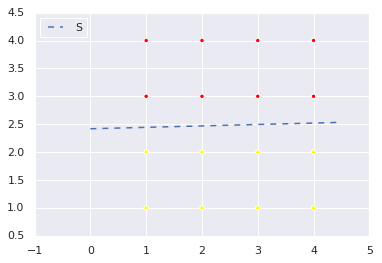

In [15]:
slope = (-1.0) * float(w[1]) / float(w[2])
intercept = (-1.0) * float(w[0]) / float(w[2])
abline(slope, intercept)

## Bank data

In [16]:
bank_df = pd.read_csv('data/bank/bank.csv', sep=';')
# bank_df = bank_df[['default', 'duration', 'campaign', 'pdays', 'job', 'education', 'balance', 'contact', 'month', 'previous', 'poutcome', 'y']]
print (len(bank_df))

#check for any missing values
print ("Nulls", bank_df.apply(lambda x: sum(x.isnull()),axis=0))
bank_df.head()

4521
('Nulls', age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64)


age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [17]:
bank_df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

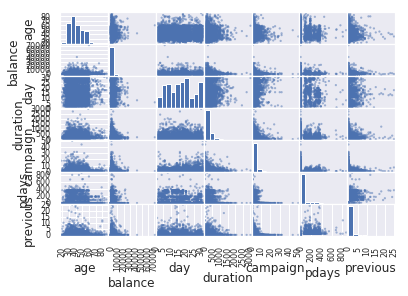

In [18]:
scatter_matrix(bank_df)
plt.show()

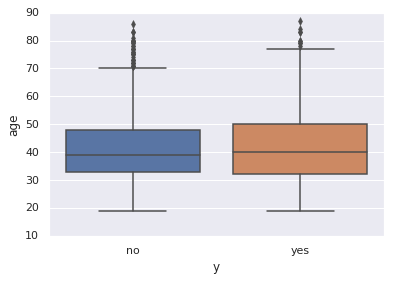

In [19]:
sns.boxplot(x='y', y='age', data=bank_df)

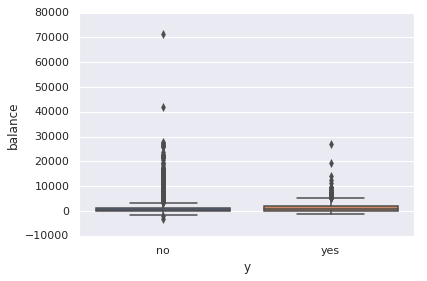

In [20]:
sns.boxplot(x='y', y='balance', data=bank_df)

In [21]:
min_val = bank_df["balance"].min()
max_val = 18000
bank_df = remove_outliers(df=bank_df, column='balance' , minimum=min_val, maximum=max_val)

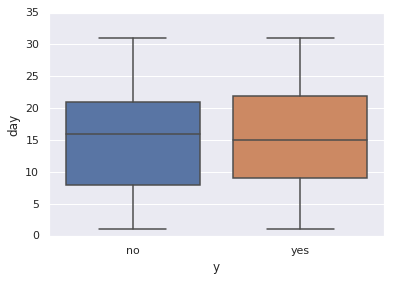

In [22]:
sns.boxplot(x='y', y='day', data=bank_df)

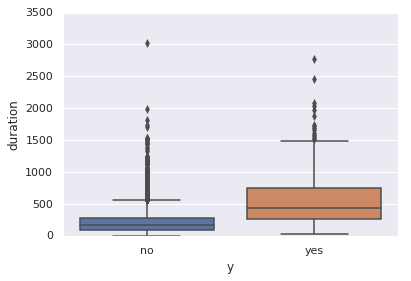

In [23]:
sns.boxplot(x='y', y='duration', data=bank_df)

In [24]:
min_val = bank_df["duration"].min()
max_val = 2000
bank_df = remove_outliers(df=bank_df, column='duration' , minimum=min_val, maximum=max_val)

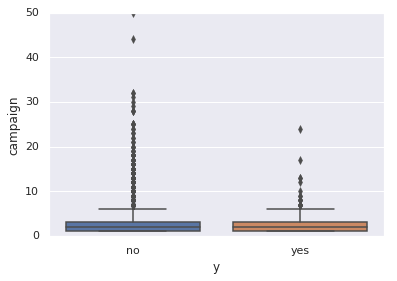

In [25]:
sns.boxplot(x='y', y='campaign', data=bank_df)

In [26]:
min_val = bank_df["campaign"].min()
max_val = 20
bank_df = remove_outliers(df=bank_df, column='campaign' , minimum=min_val, maximum=max_val)

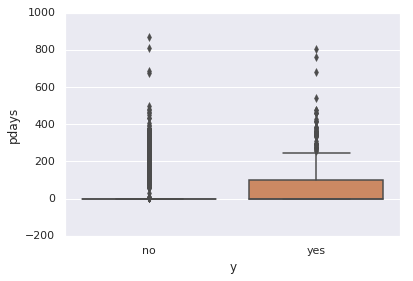

In [27]:
sns.boxplot(x='y', y='pdays', data=bank_df)

In [28]:
min_val = bank_df["pdays"].min()
max_val = 600
bank_df = remove_outliers(df=bank_df, column='pdays' , minimum=min_val, maximum=max_val)

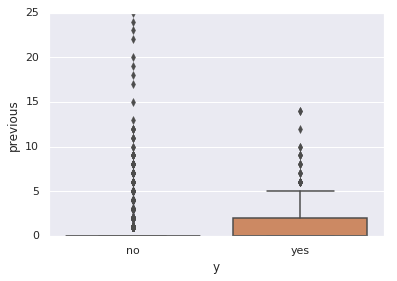

In [29]:
sns.boxplot(x='y', y='previous', data=bank_df)

In [30]:
min_val = bank_df["previous"].min()
max_val = 10
bank_df = remove_outliers(df=bank_df, column='previous' , minimum=min_val, maximum=max_val)

In [31]:
bank_df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1292.080909    15.915284   261.517984     2.667165   
std      10.576211   2289.111725     8.247667   248.911664     2.503986   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1438.000000    21.000000   328.000000     3.000000   
max      87.000000  17555.000000    31.000000  1994.000000    20.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     38.658564     0.474862  
std      96.031588     1.315701  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     541.000000    10.000000

In [32]:
bank_df['default'] =  bank_df.default.eq("yes").mul(1)
# bank_df['housing'] =  bank_df.housing.eq("yes").mul(1)
# bank_df['loan'] =  bank_df.loan.eq("yes").mul(1)
bank_df.loc[(bank_df['pdays'] == -1), 'pdays'] = 999

del bank_df['default']
del bank_df['contact']
del bank_df['poutcome']

bank_df['y'] = bank_df.y.map({'yes':1, 'no':0})
bank_df['x0'] = [1 for _ in range(len(bank_df))]
bank_df.head()

age          job  marital  education  balance housing loan  day month  \
0   30   unemployed  married    primary   1787.0      no   no   19   oct   
1   33     services  married  secondary   4789.0     yes  yes   11   may   
2   35   management   single   tertiary   1350.0     yes   no   16   apr   
3   30   management  married   tertiary   1476.0     yes  yes    3   jun   
4   59  blue-collar  married  secondary      0.0     yes   no    5   may   

   duration  campaign  pdays  previous  y  x0  
0      79.0       1.0  999.0       0.0  0   1  
1     220.0       1.0  339.0       4.0  0   1  
2     185.0       1.0  330.0       1.0  0   1  
3     199.0       4.0  999.0       0.0  0   1  
4     226.0       1.0  999.0       0.0  0   1

In [33]:
# bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
bank_df = pd.get_dummies(bank_df)
bank_df['y_axis'] = range(1, len(bank_df) + 1)
print (bank_df.columns)
bank_df.head()

Index([u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'y', u'x0', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'loan_no',
       u'loan_yes', u'month_apr', u'month_aug', u'month_dec', u'month_feb',
       u'month_jan', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'month_nov', u'month_oct', u'month_sep', u'y_axis'],
      dtype='object')


age  balance  day  duration  campaign  pdays  previous  y  x0  job_admin.  \
0   30   1787.0   19      79.0       1.0  999.0       0.0  0   1           0   
1   33   4789.0   11     220.0       1.0  339.0       4.0  0   1           0   
2   35   1350.0   16     185.0       1.0  330.0       1.0  0   1           0   
3   30   1476.0    3     199.0       4.0  999.0       0.0  0   1           0   
4   59      0.0    5     226.0       1.0  999.0       0.0  0   1           0   

    ...    month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0   ...            0          0          0          0          0          0   
1   ...            0          0          0          0          0          1   
2   ...            0          0          0          0          0          0   
3   ...            0          0          0          1          0          0   
4   ...            0          0          0          0          0          1   

   month_nov  month_oct  month_sep  y_axis  
0          0          1          0       1  
1          0          0          0       2  
2          0          0          0       3  
3          0          0          0       4  
4          0          0          0       5  

[5 rows x 45 columns]

In [34]:
# bank_df = normalize(bank_df, ['y', 'x0', 'y_axis'])
bank_df = bank_df.append(bank_df[bank_df.y == 0] * 3, ignore_index=True)
bank_df = shuffle(bank_df)
bank_df.head()

age  balance  day  duration  campaign   pdays  previous  y  x0  \
4966   96   2460.0   51    2214.0       9.0  2997.0       0.0  0   3   
6231  171      0.0   27     771.0       6.0  2997.0       0.0  0   3   
7797   93     93.0   78    1503.0       6.0  2997.0       0.0  0   3   
8322  111      0.0   93     561.0       6.0  2997.0       0.0  0   3   
4326   37      9.0   26     484.0       2.0   999.0       0.0  0   1   

      job_admin.   ...    month_feb  month_jan  month_jul  month_jun  \
4966           0   ...            0          0          3          0   
6231           0   ...            0          0          0          3   
7797           0   ...            0          0          0          0   
8322           0   ...            0          0          3          0   
4326           0   ...            0          0          0          0   

      month_mar  month_may  month_nov  month_oct  month_sep  y_axis  
4966          0          0          0          0          0    1536  
6231          0          0          0          0          0    5826  
7797          0          3          0          0          0   11091  
8322          0          0          0          0          0   12900  
4326          0          0          0          0          0    4327  

[5 rows x 45 columns]

In [35]:
train_df, test_df = train_test_split(bank_df, test_size=0.5)
print (len(train_df), len(test_df))

(4260, 4261)


In [36]:
features = [u'x0', u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'loan_no',
       u'loan_yes', u'month_apr', u'month_aug', u'month_dec', u'month_feb',
       u'month_jan', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'month_nov', u'month_oct', u'month_sep']

# features = ['x0', u'age', u'default', u'balance', u'housing', u'loan', u'day',
#        u'duration', u'campaign', u'pdays', u'previous']
# print (features)

data_df = train_df[features]
output_label_df = train_df['y']

w = train_weights(data_df, output_label_df, features, max_iterations=5000)
print (w)

('get_convergence', 1094.0)
Iteration: 0, Convergence: 1094.0
Iteration: 1, Convergence: 1094.0
Iteration: 2, Convergence: 1094.0
Iteration: 3, Convergence: 1094.0
Iteration: 4, Convergence: 1094.0
Iteration: 5, Convergence: 1094.0
Iteration: 6, Convergence: 1094.0
Iteration: 7, Convergence: 1094.0
Iteration: 8, Convergence: 1094.0
Iteration: 9, Convergence: 1094.0
Iteration: 10, Convergence: 1094.0
Iteration: 11, Convergence: 1094.0
Iteration: 12, Convergence: 1094.0
Iteration: 13, Convergence: 1094.0
Iteration: 14, Convergence: 1094.0
Iteration: 15, Convergence: 1094.0
Iteration: 16, Convergence: 1094.0
Iteration: 17, Convergence: 1094.0
Iteration: 18, Convergence: 1094.0
Iteration: 19, Convergence: 1094.0
Iteration: 20, Convergence: 1094.0
Iteration: 21, Convergence: 1094.0
Iteration: 22, Convergence: 1094.0
Iteration: 23, Convergence: 1094.0
Iteration: 24, Convergence: 1094.0
Iteration: 25, Convergence: 1094.0
Iteration: 26, Convergence: 1094.0
Iteration: 27, Convergence: 1094.0
It

Iteration: 238, Convergence: 1094.0
Iteration: 239, Convergence: 1094.0
Iteration: 240, Convergence: 1094.0
Iteration: 241, Convergence: 1094.0
Iteration: 242, Convergence: 1094.0
Iteration: 243, Convergence: 1094.0
Iteration: 244, Convergence: 1094.0
Iteration: 245, Convergence: 1094.0
Iteration: 246, Convergence: 1094.0
Iteration: 247, Convergence: 1094.0
Iteration: 248, Convergence: 1094.0
Iteration: 249, Convergence: 1094.0
Iteration: 250, Convergence: 1094.0
Iteration: 251, Convergence: 1094.0
Iteration: 252, Convergence: 1094.0
Iteration: 253, Convergence: 1094.0
Iteration: 254, Convergence: 1094.0
Iteration: 255, Convergence: 1094.0
Iteration: 256, Convergence: 1094.0
Iteration: 257, Convergence: 1094.0
Iteration: 258, Convergence: 1094.0
Iteration: 259, Convergence: 1094.0
Iteration: 260, Convergence: 1094.0
Iteration: 261, Convergence: 1094.0
Iteration: 262, Convergence: 1094.0
Iteration: 263, Convergence: 1094.0
Iteration: 264, Convergence: 1094.0
Iteration: 265, Convergence:

Iteration: 476, Convergence: 1094.0
Iteration: 477, Convergence: 1094.0
Iteration: 478, Convergence: 1094.0
Iteration: 479, Convergence: 1094.0
Iteration: 480, Convergence: 1094.0
Iteration: 481, Convergence: 1094.0
Iteration: 482, Convergence: 1094.0
Iteration: 483, Convergence: 1094.0
Iteration: 484, Convergence: 1094.0
Iteration: 485, Convergence: 1094.0
Iteration: 486, Convergence: 1094.0
Iteration: 487, Convergence: 1094.0
Iteration: 488, Convergence: 1094.0
Iteration: 489, Convergence: 1094.0
Iteration: 490, Convergence: 1094.0
Iteration: 491, Convergence: 1094.0
Iteration: 492, Convergence: 1094.0
Iteration: 493, Convergence: 1094.0
Iteration: 494, Convergence: 1094.0
Iteration: 495, Convergence: 1094.0
Iteration: 496, Convergence: 1094.0
Iteration: 497, Convergence: 1094.0
Iteration: 498, Convergence: 1094.0
Iteration: 499, Convergence: 1094.0
Iteration: 500, Convergence: 1094.0
Iteration: 501, Convergence: 1094.0
Iteration: 502, Convergence: 1094.0
Iteration: 503, Convergence:

Iteration: 705, Convergence: 1094.0
Iteration: 706, Convergence: 1094.0
Iteration: 707, Convergence: 1094.0
Iteration: 708, Convergence: 1094.0
Iteration: 709, Convergence: 1094.0
Iteration: 710, Convergence: 1094.0
Iteration: 711, Convergence: 1094.0
Iteration: 712, Convergence: 1094.0
Iteration: 713, Convergence: 1094.0
Iteration: 714, Convergence: 1094.0
Iteration: 715, Convergence: 1094.0
Iteration: 716, Convergence: 1094.0
Iteration: 717, Convergence: 1094.0
Iteration: 718, Convergence: 1094.0
Iteration: 719, Convergence: 1094.0
Iteration: 720, Convergence: 1094.0
Iteration: 721, Convergence: 1094.0
Iteration: 722, Convergence: 1094.0
Iteration: 723, Convergence: 1094.0
Iteration: 724, Convergence: 1094.0
Iteration: 725, Convergence: 1094.0
Iteration: 726, Convergence: 1094.0
Iteration: 727, Convergence: 1094.0
Iteration: 728, Convergence: 1094.0
Iteration: 729, Convergence: 1094.0
Iteration: 730, Convergence: 1094.0
Iteration: 731, Convergence: 1094.0
Iteration: 732, Convergence:

Iteration: 951, Convergence: 132.5
Iteration: 952, Convergence: 132.5
Iteration: 953, Convergence: 132.5
Iteration: 954, Convergence: 132.5
Iteration: 955, Convergence: 132.5
Iteration: 956, Convergence: 132.5
Iteration: 957, Convergence: 132.5
Iteration: 958, Convergence: 132.5
Iteration: 959, Convergence: 132.5
Iteration: 960, Convergence: 132.5
Iteration: 961, Convergence: 132.5
Iteration: 962, Convergence: 132.5
Iteration: 963, Convergence: 132.5
Iteration: 964, Convergence: 132.5
Iteration: 965, Convergence: 132.5
Iteration: 966, Convergence: 132.5
Iteration: 967, Convergence: 132.5
Iteration: 968, Convergence: 132.5
Iteration: 969, Convergence: 132.5
Iteration: 970, Convergence: 132.5
Iteration: 971, Convergence: 132.5
Iteration: 972, Convergence: 132.5
Iteration: 973, Convergence: 132.5
Iteration: 974, Convergence: 132.5
Iteration: 975, Convergence: 132.5
Iteration: 976, Convergence: 132.5
Iteration: 977, Convergence: 132.5
Iteration: 978, Convergence: 132.5
Iteration: 979, Conv

Iteration: 1186, Convergence: 132.5
Iteration: 1187, Convergence: 132.5
Iteration: 1188, Convergence: 132.5
Iteration: 1189, Convergence: 132.5
Iteration: 1190, Convergence: 132.5
Iteration: 1191, Convergence: 132.5
Iteration: 1192, Convergence: 132.5
Iteration: 1193, Convergence: 132.5
Iteration: 1194, Convergence: 132.5
Iteration: 1195, Convergence: 132.5
Iteration: 1196, Convergence: 132.5
Iteration: 1197, Convergence: 132.5
Iteration: 1198, Convergence: 132.5
Iteration: 1199, Convergence: 132.5
Iteration: 1200, Convergence: 132.5
Iteration: 1201, Convergence: 132.5
Iteration: 1202, Convergence: 132.5
Iteration: 1203, Convergence: 132.5
Iteration: 1204, Convergence: 132.5
Iteration: 1205, Convergence: 132.5
Iteration: 1206, Convergence: 132.5
Iteration: 1207, Convergence: 132.5
Iteration: 1208, Convergence: 132.5
Iteration: 1209, Convergence: 132.5
Iteration: 1210, Convergence: 132.5
Iteration: 1211, Convergence: 132.5
Iteration: 1212, Convergence: 132.5
Iteration: 1213, Convergence

Iteration: 1420, Convergence: 132.5
Iteration: 1421, Convergence: 132.5
Iteration: 1422, Convergence: 132.5
Iteration: 1423, Convergence: 132.5
Iteration: 1424, Convergence: 132.5
Iteration: 1425, Convergence: 132.5
Iteration: 1426, Convergence: 132.5
Iteration: 1427, Convergence: 132.5
Iteration: 1428, Convergence: 132.5
Iteration: 1429, Convergence: 132.5
Iteration: 1430, Convergence: 132.5
Iteration: 1431, Convergence: 132.5
Iteration: 1432, Convergence: 132.5
Iteration: 1433, Convergence: 132.5
Iteration: 1434, Convergence: 132.5
Iteration: 1435, Convergence: 132.5
Iteration: 1436, Convergence: 132.5
Iteration: 1437, Convergence: 132.5
Iteration: 1438, Convergence: 132.5
Iteration: 1439, Convergence: 132.5
Iteration: 1440, Convergence: 132.5
Iteration: 1441, Convergence: 132.5
Iteration: 1442, Convergence: 132.5
Iteration: 1443, Convergence: 132.5
Iteration: 1444, Convergence: 132.5
Iteration: 1445, Convergence: 132.5
Iteration: 1446, Convergence: 132.5
Iteration: 1447, Convergence

Iteration: 1655, Convergence: 132.5
Iteration: 1656, Convergence: 132.5
Iteration: 1657, Convergence: 132.5
Iteration: 1658, Convergence: 132.5
Iteration: 1659, Convergence: 132.5
Iteration: 1660, Convergence: 132.5
Iteration: 1661, Convergence: 132.5
Iteration: 1662, Convergence: 132.5
Iteration: 1663, Convergence: 132.5
Iteration: 1664, Convergence: 132.5
Iteration: 1665, Convergence: 132.5
Iteration: 1666, Convergence: 132.5
Iteration: 1667, Convergence: 132.5
Iteration: 1668, Convergence: 132.5
Iteration: 1669, Convergence: 132.5
Iteration: 1670, Convergence: 132.5
Iteration: 1671, Convergence: 132.5
Iteration: 1672, Convergence: 132.5
Iteration: 1673, Convergence: 132.5
Iteration: 1674, Convergence: 132.5
Iteration: 1675, Convergence: 132.5
Iteration: 1676, Convergence: 132.5
Iteration: 1677, Convergence: 132.5
Iteration: 1678, Convergence: 132.5
Iteration: 1679, Convergence: 132.5
Iteration: 1680, Convergence: 132.5
Iteration: 1681, Convergence: 132.5
Iteration: 1682, Convergence

Iteration: 1889, Convergence: 132.5
Iteration: 1890, Convergence: 132.5
Iteration: 1891, Convergence: 132.5
Iteration: 1892, Convergence: 132.5
Iteration: 1893, Convergence: 132.5
Iteration: 1894, Convergence: 132.5
Iteration: 1895, Convergence: 132.5
Iteration: 1896, Convergence: 132.5
Iteration: 1897, Convergence: 132.5
Iteration: 1898, Convergence: 132.5
Iteration: 1899, Convergence: 132.5
Iteration: 1900, Convergence: 132.5
Iteration: 1901, Convergence: 132.5
Iteration: 1902, Convergence: 132.5
Iteration: 1903, Convergence: 132.5
Iteration: 1904, Convergence: 132.5
Iteration: 1905, Convergence: 132.5
Iteration: 1906, Convergence: 132.5
Iteration: 1907, Convergence: 132.5
Iteration: 1908, Convergence: 132.5
Iteration: 1909, Convergence: 132.5
Iteration: 1910, Convergence: 132.5
Iteration: 1911, Convergence: 132.5
Iteration: 1912, Convergence: 132.5
Iteration: 1913, Convergence: 132.5
Iteration: 1914, Convergence: 132.5
Iteration: 1915, Convergence: 132.5
Iteration: 1916, Convergence

Iteration: 2124, Convergence: 132.5
Iteration: 2125, Convergence: 132.5
Iteration: 2126, Convergence: 132.5
Iteration: 2127, Convergence: 132.5
Iteration: 2128, Convergence: 132.5
Iteration: 2129, Convergence: 132.5
Iteration: 2130, Convergence: 132.5
Iteration: 2131, Convergence: 132.5
Iteration: 2132, Convergence: 132.5
Iteration: 2133, Convergence: 132.5
Iteration: 2134, Convergence: 132.5
Iteration: 2135, Convergence: 132.5
Iteration: 2136, Convergence: 132.5
Iteration: 2137, Convergence: 132.5
Iteration: 2138, Convergence: 132.5
Iteration: 2139, Convergence: 132.5
Iteration: 2140, Convergence: 132.5
Iteration: 2141, Convergence: 132.5
Iteration: 2142, Convergence: 132.5
Iteration: 2143, Convergence: 132.5
Iteration: 2144, Convergence: 132.5
Iteration: 2145, Convergence: 132.5
Iteration: 2146, Convergence: 132.5
Iteration: 2147, Convergence: 132.5
Iteration: 2148, Convergence: 132.5
Iteration: 2149, Convergence: 132.5
Iteration: 2150, Convergence: 132.5
Iteration: 2151, Convergence

Iteration: 2358, Convergence: 132.5
Iteration: 2359, Convergence: 132.5
Iteration: 2360, Convergence: 132.5
Iteration: 2361, Convergence: 132.5
Iteration: 2362, Convergence: 132.5
Iteration: 2363, Convergence: 132.5
Iteration: 2364, Convergence: 132.5
Iteration: 2365, Convergence: 132.5
Iteration: 2366, Convergence: 132.5
Iteration: 2367, Convergence: 132.5
Iteration: 2368, Convergence: 132.5
Iteration: 2369, Convergence: 132.5
Iteration: 2370, Convergence: 132.5
Iteration: 2371, Convergence: 132.5
Iteration: 2372, Convergence: 132.5
Iteration: 2373, Convergence: 132.5
Iteration: 2374, Convergence: 132.5
Iteration: 2375, Convergence: 132.5
Iteration: 2376, Convergence: 132.5
Iteration: 2377, Convergence: 132.5
Iteration: 2378, Convergence: 132.5
Iteration: 2379, Convergence: 132.5
Iteration: 2380, Convergence: 132.5
Iteration: 2381, Convergence: 132.5
Iteration: 2382, Convergence: 132.5
Iteration: 2383, Convergence: 132.5
Iteration: 2384, Convergence: 132.5
Iteration: 2385, Convergence

Iteration: 2592, Convergence: 132.5
Iteration: 2593, Convergence: 132.5
Iteration: 2594, Convergence: 132.5
Iteration: 2595, Convergence: 132.5
Iteration: 2596, Convergence: 132.5
Iteration: 2597, Convergence: 132.5
Iteration: 2598, Convergence: 132.5
Iteration: 2599, Convergence: 132.5
Iteration: 2600, Convergence: 132.5
Iteration: 2601, Convergence: 132.5
Iteration: 2602, Convergence: 132.5
Iteration: 2603, Convergence: 132.5
Iteration: 2604, Convergence: 132.5
Iteration: 2605, Convergence: 132.5
Iteration: 2606, Convergence: 132.5
Iteration: 2607, Convergence: 132.5
Iteration: 2608, Convergence: 132.5
Iteration: 2609, Convergence: 132.5
Iteration: 2610, Convergence: 132.5
Iteration: 2611, Convergence: 132.5
Iteration: 2612, Convergence: 132.5
Iteration: 2613, Convergence: 132.5
Iteration: 2614, Convergence: 132.5
Iteration: 2615, Convergence: 132.5
Iteration: 2616, Convergence: 132.5
Iteration: 2617, Convergence: 132.5
Iteration: 2618, Convergence: 132.5
Iteration: 2619, Convergence

Iteration: 2826, Convergence: 132.5
Iteration: 2827, Convergence: 132.5
Iteration: 2828, Convergence: 132.5
Iteration: 2829, Convergence: 132.5
Iteration: 2830, Convergence: 132.5
Iteration: 2831, Convergence: 132.5
Iteration: 2832, Convergence: 132.5
Iteration: 2833, Convergence: 132.5
Iteration: 2834, Convergence: 132.5
Iteration: 2835, Convergence: 132.5
Iteration: 2836, Convergence: 132.5
Iteration: 2837, Convergence: 132.5
Iteration: 2838, Convergence: 132.5
Iteration: 2839, Convergence: 132.5
Iteration: 2840, Convergence: 132.5
Iteration: 2841, Convergence: 132.5
Iteration: 2842, Convergence: 132.5
Iteration: 2843, Convergence: 132.5
Iteration: 2844, Convergence: 132.5
Iteration: 2845, Convergence: 132.5
Iteration: 2846, Convergence: 132.5
Iteration: 2847, Convergence: 132.5
Iteration: 2848, Convergence: 132.5
Iteration: 2849, Convergence: 132.5
Iteration: 2850, Convergence: 132.5
Iteration: 2851, Convergence: 132.5
Iteration: 2852, Convergence: 132.5
Iteration: 2853, Convergence

Iteration: 3057, Convergence: 132.5
Iteration: 3058, Convergence: 132.5
Iteration: 3059, Convergence: 132.5
Iteration: 3060, Convergence: 132.5
Iteration: 3061, Convergence: 132.5
Iteration: 3062, Convergence: 132.5
Iteration: 3063, Convergence: 132.5
Iteration: 3064, Convergence: 132.5
Iteration: 3065, Convergence: 132.5
Iteration: 3066, Convergence: 132.5
Iteration: 3067, Convergence: 132.5
Iteration: 3068, Convergence: 132.5
Iteration: 3069, Convergence: 132.5
Iteration: 3070, Convergence: 132.5
Iteration: 3071, Convergence: 132.5
Iteration: 3072, Convergence: 132.5
Iteration: 3073, Convergence: 132.5
Iteration: 3074, Convergence: 132.5
Iteration: 3075, Convergence: 132.5
Iteration: 3076, Convergence: 132.5
Iteration: 3077, Convergence: 132.5
Iteration: 3078, Convergence: 132.5
Iteration: 3079, Convergence: 132.5
Iteration: 3080, Convergence: 132.5
Iteration: 3081, Convergence: 132.5
Iteration: 3082, Convergence: 132.5
Iteration: 3083, Convergence: 132.5
Iteration: 3084, Convergence

Iteration: 3288, Convergence: 132.5
Iteration: 3289, Convergence: 132.5
Iteration: 3290, Convergence: 132.5
Iteration: 3291, Convergence: 132.5
Iteration: 3292, Convergence: 132.5
Iteration: 3293, Convergence: 132.5
Iteration: 3294, Convergence: 132.5
Iteration: 3295, Convergence: 132.5
Iteration: 3296, Convergence: 132.5
Iteration: 3297, Convergence: 132.5
Iteration: 3298, Convergence: 132.5
Iteration: 3299, Convergence: 132.5
Iteration: 3300, Convergence: 132.5
Iteration: 3301, Convergence: 132.5
Iteration: 3302, Convergence: 132.5
Iteration: 3303, Convergence: 132.5
Iteration: 3304, Convergence: 132.5
Iteration: 3305, Convergence: 132.5
Iteration: 3306, Convergence: 132.5
Iteration: 3307, Convergence: 132.5
Iteration: 3308, Convergence: 132.5
Iteration: 3309, Convergence: 132.5
Iteration: 3310, Convergence: 132.5
Iteration: 3311, Convergence: 132.5
Iteration: 3312, Convergence: 132.5
Iteration: 3313, Convergence: 132.5
Iteration: 3314, Convergence: 132.5
Iteration: 3315, Convergence

Iteration: 3522, Convergence: 132.5
Iteration: 3523, Convergence: 132.5
Iteration: 3524, Convergence: 132.5
Iteration: 3525, Convergence: 132.5
Iteration: 3526, Convergence: 132.5
Iteration: 3527, Convergence: 132.5
Iteration: 3528, Convergence: 132.5
Iteration: 3529, Convergence: 132.5
Iteration: 3530, Convergence: 132.5
Iteration: 3531, Convergence: 132.5
Iteration: 3532, Convergence: 132.5
Iteration: 3533, Convergence: 132.5
Iteration: 3534, Convergence: 132.5
Iteration: 3535, Convergence: 132.5
Iteration: 3536, Convergence: 132.5
Iteration: 3537, Convergence: 132.5
Iteration: 3538, Convergence: 132.5
Iteration: 3539, Convergence: 132.5
Iteration: 3540, Convergence: 132.5
Iteration: 3541, Convergence: 132.5
Iteration: 3542, Convergence: 132.5
Iteration: 3543, Convergence: 132.5
Iteration: 3544, Convergence: 132.5
Iteration: 3545, Convergence: 132.5
Iteration: 3546, Convergence: 132.5
Iteration: 3547, Convergence: 132.5
Iteration: 3548, Convergence: 132.5
Iteration: 3549, Convergence

Iteration: 3756, Convergence: 132.5
Iteration: 3757, Convergence: 132.5
Iteration: 3758, Convergence: 132.5
Iteration: 3759, Convergence: 132.5
Iteration: 3760, Convergence: 132.5
Iteration: 3761, Convergence: 132.5
Iteration: 3762, Convergence: 132.5
Iteration: 3763, Convergence: 132.5
Iteration: 3764, Convergence: 132.5
Iteration: 3765, Convergence: 132.5
Iteration: 3766, Convergence: 132.5
Iteration: 3767, Convergence: 132.5
Iteration: 3768, Convergence: 132.5
Iteration: 3769, Convergence: 132.5
Iteration: 3770, Convergence: 132.5
Iteration: 3771, Convergence: 132.5
Iteration: 3772, Convergence: 132.5
Iteration: 3773, Convergence: 132.5
Iteration: 3774, Convergence: 132.5
Iteration: 3775, Convergence: 132.5
Iteration: 3776, Convergence: 132.5
Iteration: 3777, Convergence: 132.5
Iteration: 3778, Convergence: 132.5
Iteration: 3779, Convergence: 132.5
Iteration: 3780, Convergence: 132.5
Iteration: 3781, Convergence: 132.5
Iteration: 3782, Convergence: 132.5
Iteration: 3783, Convergence

Iteration: 3987, Convergence: 132.5
Iteration: 3988, Convergence: 132.5
Iteration: 3989, Convergence: 132.5
Iteration: 3990, Convergence: 132.5
Iteration: 3991, Convergence: 132.5
Iteration: 3992, Convergence: 132.5
Iteration: 3993, Convergence: 132.5
Iteration: 3994, Convergence: 132.5
Iteration: 3995, Convergence: 132.5
Iteration: 3996, Convergence: 132.5
Iteration: 3997, Convergence: 132.5
Iteration: 3998, Convergence: 132.5
Iteration: 3999, Convergence: 132.5
Iteration: 4000, Convergence: 132.5
Iteration: 4001, Convergence: 132.5
Iteration: 4002, Convergence: 132.5
Iteration: 4003, Convergence: 132.5
Iteration: 4004, Convergence: 132.5
Iteration: 4005, Convergence: 132.5
Iteration: 4006, Convergence: 132.5
Iteration: 4007, Convergence: 132.5
Iteration: 4008, Convergence: 132.5
Iteration: 4009, Convergence: 132.5
Iteration: 4010, Convergence: 132.5
Iteration: 4011, Convergence: 132.5
Iteration: 4012, Convergence: 132.5
Iteration: 4013, Convergence: 132.5
Iteration: 4014, Convergence

Iteration: 4219, Convergence: 132.5
Iteration: 4220, Convergence: 132.5
Iteration: 4221, Convergence: 132.5
Iteration: 4222, Convergence: 132.5
Iteration: 4223, Convergence: 132.5
Iteration: 4224, Convergence: 132.5
Iteration: 4225, Convergence: 132.5
Iteration: 4226, Convergence: 132.5
Iteration: 4227, Convergence: 132.5
Iteration: 4228, Convergence: 132.5
Iteration: 4229, Convergence: 132.5
Iteration: 4230, Convergence: 132.5
Iteration: 4231, Convergence: 132.5
Iteration: 4232, Convergence: 132.5
Iteration: 4233, Convergence: 132.5
Iteration: 4234, Convergence: 132.5
Iteration: 4235, Convergence: 132.5
Iteration: 4236, Convergence: 132.5
Iteration: 4237, Convergence: 132.5
Iteration: 4238, Convergence: 132.5
Iteration: 4239, Convergence: 132.5
Iteration: 4240, Convergence: 132.5
Iteration: 4241, Convergence: 132.5
Iteration: 4242, Convergence: 132.5
Iteration: 4243, Convergence: 132.5
Iteration: 4244, Convergence: 132.5
Iteration: 4245, Convergence: 132.5
Iteration: 4246, Convergence

Iteration: 4450, Convergence: 132.5
Iteration: 4451, Convergence: 132.5
Iteration: 4452, Convergence: 132.5
Iteration: 4453, Convergence: 132.5
Iteration: 4454, Convergence: 132.5
Iteration: 4455, Convergence: 132.5
Iteration: 4456, Convergence: 132.5
Iteration: 4457, Convergence: 132.5
Iteration: 4458, Convergence: 132.5
Iteration: 4459, Convergence: 132.5
Iteration: 4460, Convergence: 132.5
Iteration: 4461, Convergence: 132.5
Iteration: 4462, Convergence: 132.5
Iteration: 4463, Convergence: 132.5
Iteration: 4464, Convergence: 132.5
Iteration: 4465, Convergence: 132.5
Iteration: 4466, Convergence: 132.5
Iteration: 4467, Convergence: 132.5
Iteration: 4468, Convergence: 132.5
Iteration: 4469, Convergence: 132.5
Iteration: 4470, Convergence: 132.5
Iteration: 4471, Convergence: 132.5
Iteration: 4472, Convergence: 132.5
Iteration: 4473, Convergence: 132.5
Iteration: 4474, Convergence: 132.5
Iteration: 4475, Convergence: 132.5
Iteration: 4476, Convergence: 132.5
Iteration: 4477, Convergence

Iteration: 4683, Convergence: 132.5
Iteration: 4684, Convergence: 132.5
Iteration: 4685, Convergence: 132.5
Iteration: 4686, Convergence: 132.5
Iteration: 4687, Convergence: 132.5
Iteration: 4688, Convergence: 132.5
Iteration: 4689, Convergence: 132.5
Iteration: 4690, Convergence: 132.5
Iteration: 4691, Convergence: 132.5
Iteration: 4692, Convergence: 132.5
Iteration: 4693, Convergence: 132.5
Iteration: 4694, Convergence: 132.5
Iteration: 4695, Convergence: 132.5
Iteration: 4696, Convergence: 132.5
Iteration: 4697, Convergence: 132.5
Iteration: 4698, Convergence: 132.5
Iteration: 4699, Convergence: 132.5
Iteration: 4700, Convergence: 132.5
Iteration: 4701, Convergence: 132.5
Iteration: 4702, Convergence: 132.5
Iteration: 4703, Convergence: 132.5
Iteration: 4704, Convergence: 132.5
Iteration: 4705, Convergence: 132.5
Iteration: 4706, Convergence: 132.5
Iteration: 4707, Convergence: 132.5
Iteration: 4708, Convergence: 132.5
Iteration: 4709, Convergence: 132.5
Iteration: 4710, Convergence

Iteration: 4917, Convergence: 132.5
Iteration: 4918, Convergence: 132.5
Iteration: 4919, Convergence: 132.5
Iteration: 4920, Convergence: 132.5
Iteration: 4921, Convergence: 132.5
Iteration: 4922, Convergence: 132.5
Iteration: 4923, Convergence: 132.5
Iteration: 4924, Convergence: 132.5
Iteration: 4925, Convergence: 132.5
Iteration: 4926, Convergence: 132.5
Iteration: 4927, Convergence: 132.5
Iteration: 4928, Convergence: 132.5
Iteration: 4929, Convergence: 132.5
Iteration: 4930, Convergence: 132.5
Iteration: 4931, Convergence: 132.5
Iteration: 4932, Convergence: 132.5
Iteration: 4933, Convergence: 132.5
Iteration: 4934, Convergence: 132.5
Iteration: 4935, Convergence: 132.5
Iteration: 4936, Convergence: 132.5
Iteration: 4937, Convergence: 132.5
Iteration: 4938, Convergence: 132.5
Iteration: 4939, Convergence: 132.5
Iteration: 4940, Convergence: 132.5
Iteration: 4941, Convergence: 132.5
Iteration: 4942, Convergence: 132.5
Iteration: 4943, Convergence: 132.5
Iteration: 4944, Convergence

In [37]:
# test
print ('train_error', get_convergence(np.array(train_df[features]), np.array(train_df['y']), w))
print ('test_error', get_convergence(np.array(test_df[features]), np.array(test_df['y']), w))

('train_error', 132.5)
('test_error', 142.0)


In [38]:
print ('train_error_ratio', get_convergence(np.array(train_df[features]), np.array(train_df['y']), w, return_number_of_incorrects=True) / len(train_df))
print ('train_error_ratio', get_convergence(np.array(test_df[features]), np.array(test_df['y']), w, return_number_of_incorrects=True) / len(test_df))

('train_error_ratio', 0)
('train_error_ratio', 0)


In [39]:
# get_convergence(np.array(bank_df[features]), np.array(bank_df['y']), w)